# ASR

In [1]:
# from ASRCode.asr import ASR
# !pip install pyriemann

In [2]:
!pip install pyedflib

Looking in links: /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo/avx2, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo/generic, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/generic
^C
ERROR: Operation cancelled by user


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pyedflib

In [4]:
raw = np.load('eeg_raw.npy')
sfreq = 250

FileNotFoundError: [Errno 2] No such file or directory: 'eeg_raw.npy'

In [ ]:
raw.shape

In [ ]:
# Train on a clean portion of data
asr = ASR(sfreq=sfreq, method='euclid', blocksize=10)
train_idx = np.arange(0 * sfreq, 30 * sfreq, dtype=int)
_, sample_mask = asr.fit(raw[:, train_idx])

In [ ]:
clean, mask = asr.transform(raw)

In [ ]:
clean.shape

In [ ]:
mask.shape

In [ ]:
def separate_array(array_in):
  start = 0
  end = 0
  list_arrays = []
  for id in np.arange(1,len(array_in)):
    end = id
    if array_in[id] != array_in[id-1]+1:
      # print(array_in[id])
      # print(array_in[id-1])
      list_arrays.append(array_in[start:end])
      start = end
  return list_arrays

In [ ]:
mask_ids = np.where(mask==False)[0]

In [ ]:
mask_ids.shape

In [ ]:
list_segments = separate_array(mask_ids)

In [ ]:
times = np.arange(raw.shape[-1]) / sfreq
f, ax = plt.subplots(8, sharex=True, figsize=(20, 12))
for i in range(8):
  ax[i].plot(times, raw[i], lw=.5, label='before ASR')
  ax[i].plot(times, clean[i], label='after ASR', lw=.5)
  ax[i].set_ylim([-50, 50])
  ax[i].set_ylabel(f'ch{i}')
  ax[i].set_yticks([])
  # print(range(len(mask_ids)-1))
  j=0
  for array in list_segments:
    # print(tmp_ids)
    ax[i].fill_between(array / sfreq, 0, 1, color='grey', alpha=.3,
                      transform=ax[i].get_xaxis_transform())
    j += 2
ax[i].set_xlabel('Time (s)')
ax[0].legend(fontsize='small', bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.subplots_adjust(hspace=0, right=0.75)
plt.suptitle('Before/after ASR')
plt.show()

In [ ]:
times = np.arange(6250) / sfreq #raw.shape[-1]
f, ax = plt.subplots(figsize=(20, 12))
ax.plot(times, raw[7,0:6250], lw=.5, label='before ASR')
ax.plot(times, clean[7,0:6250], label='after ASR', lw=.5)
ax.set_ylim([-50, 50])
ax.set_ylabel(f'ch{i}')
# print(range(len(mask_ids)-1))
j=0
for array in list_segments:
  if (array[0]/sfreq <= times[-1]):
    # print(tmp_ids)
    ax.fill_between(array / sfreq, 0, 1, color='grey', alpha=.3,
                      transform=ax.get_xaxis_transform())
  j += 2
ax.set_xlabel('Time (s)')
ax.legend(fontsize='small', bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.subplots_adjust(hspace=0, right=0.75)
plt.suptitle('Before/after ASR')
plt.show()

## Tested on our data

In [ ]:
edf_in = pyedflib.EdfReader('epoch2.edf')

In [ ]:
labels = edf_in.getSignalLabels()
nch = len(labels)

In [ ]:
N=edf_in.getNSamples()[0]

In [ ]:
chns = np.arange(nch)
signal = np.array([], dtype=np.int64).reshape(0,N)
for chan in chns:
  chn_sig = edf_in.readSignal(chan)
  signal = np.vstack([signal, chn_sig])
signal.shape

In [ ]:
srate = edf_in.getSampleFrequencies()[0]/edf_in.datarecord_duration
t = np.arange(0,N)/srate

In [ ]:
# Train on a clean portion of data
asr = ASR(sfreq=srate, method='euclid', blocksize=10)
train_idx = np.arange(0 * srate, 30 * srate, dtype=int)
_, sample_mask = asr.fit(signal[:, train_idx])

In [ ]:
clean, mask = asr.transform(signal)

In [ ]:
mask.shape

In [ ]:
clean.shape

In [ ]:
np.logical_not(mask[0,0:10])

In [ ]:
mask[:,0:10]

In [ ]:
mask_final = np.logical_not(mask[0,:])
for i in np.arange(2,mask.shape[0]):
  tmp = np.logical_not(mask[i,:])
  mask_final = np.logical_or(mask_final,tmp)
mask_final[0:10]

In [ ]:
mask_ids = np.where(mask_final==True)[0]

In [ ]:
mask_ids

In [ ]:
list_segments = separate_array(mask_ids)

In [ ]:
end_time_id = int(25*srate)
times = np.arange(end_time_id) / srate #raw.shape[-1]
f, ax = plt.subplots(figsize=(20, 12))
ax.plot(times, signal[10,0:end_time_id], lw=.5, label='before ASR')
ax.plot(times, clean[10,0:end_time_id], label='after ASR', lw=.5)
# ax.set_ylim([-50, 50])
# ax.set_ylabel(f'ch{i}')
# print(range(len(mask_ids)-1))
j=0
for array in list_segments:
  if (array[0]/srate <= times[-1]):
    # print(tmp_ids)
    ax.fill_between(array / srate, 0, 1, color='grey', alpha=.3,
                      transform=ax.get_xaxis_transform())
  j += 2
ax.set_xlabel('Time (s)')
ax.legend(fontsize='small', bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.subplots_adjust(hspace=0, right=0.75)
plt.suptitle('Before/after ASR')
plt.show()

# Autoreject


In [ ]:
# !pip install autoreject
!pip install h5io
import autoreject.autoreject


In [ ]:
# !pip install mne
import mne

In [ ]:
import numpy as np
# !pip install pyedflib
import pyedflib

In [ ]:
def get_montage(ch_pos, subject, subjects_dir):
    """Get montage given Surface RAS (aka mri coordinates in MNE)
    Parameters
    ----------
    ch_pos : dict
        Dictionary of channel positions. Keys are channel names and values
        are 3D coordinates - array of shape (3,) - in native digitizer space
        in m.
    subject ： str
        the name of subject in FreeSurfer
    subjects_dir : str
        the directory of your FreeSurfer subject directory

    Returns : head montage
    -------
        
    """
    subj_trans = mne.coreg.estimate_head_mri_t(subject, subjects_dir)
    mri_to_head_trans = mne.transforms.invert_transform(subj_trans)
    print('Start transforming mri to head')
    print(mri_to_head_trans)

    montage_mri = mne.channels.make_dig_montage(ch_pos, coord_frame='mri')
    montage = montage_mri.copy()
    montage.add_estimated_fiducials(subject, subjects_dir)
    montage.apply_trans(mri_to_head_trans)
    return montage_mri, montage

In [ ]:
edf_in = pyedflib.EdfReader('/home/mcesped/scratch/HippiEEGAtlas/epochs/results/sub-079/ses-002/ieeg/epoch.edf')

In [ ]:
labels = edf_in.getSignalLabels()
nch = len(labels)

In [ ]:
labels[0:10]

In [ ]:
# Load positions
import pandas as pd
elec_pos = pd.read_csv('/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/seega_coordinates/sub-P079/sub-P079_space-native_SEEGA.tsv', sep='\t')
elec_pos.head()

In [ ]:
def get_chn_positions(chn_df):
    chn_pos = {}
    for i in np.arange(len(chn_df)):
        label = elec_pos.loc[[i], ['label']].values[0][0]
        pos = elec_pos.loc[[i], ['x','y','z']].values[0]/1000
        pos = pos.tolist()
        chn_pos[label] = pos
    return chn_pos

In [ ]:
chn_pos = get_chn_positions(elec_pos)

In [ ]:
labels.index(list(chn_pos.keys())[0])

In [ ]:
N=edf_in.getNSamples()[0]
N

In [ ]:
import pandas as pd

annot2 = edf_in.readAnnotations()
annot2 = {
    'Onset': annot2[0],
    'Duration': annot2[1],
    'event': annot2[2]
}
annot2 = pd.DataFrame(annot2)
annot2.head()

In [ ]:
srate = edf_in.getSampleFrequencies()[0]/edf_in.datarecord_duration
t = np.arange(0, N)/srate
t_test = np.argmin((np.abs(t-annot2.Onset.to_numpy()[2])))
srate # Time to final of epoch

In [ ]:
signal = np.array([], dtype=np.int64).reshape(0,t_test)
keys = list(chn_pos.keys())
for chan in keys:
    id_ch = labels.index(chan)
    chn_sig = edf_in.readSignal(id_ch)
    signal = np.vstack([signal, chn_sig[0:t_test]])
signal.shape

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(signal[0,:])

In [ ]:
n_epoch = int(5*srate) # 5 seconds
signal.shape[1]/n_epoch

In [ ]:
signal_epoch = np.zeros((int(signal.shape[1]/n_epoch), signal.shape[0], n_epoch))
id = 0
for epoch_id in np.arange(int(signal.shape[1]/n_epoch)):
  tmp = signal[:,id:id+n_epoch]
  signal_epoch[epoch_id,:,:] = tmp
  id += n_epoch
signal_epoch.shape

In [ ]:
info = mne.create_info(ch_names=keys,
                       ch_types=['seeg'] * len(keys),
                       sfreq=srate)

In [ ]:
mne_epochs = mne.EpochsArray(signal_epoch, info)

In [ ]:
edf_in.close()

In [ ]:
_, montage = get_montage(chn_pos, 'sub-P079', '/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/fastsurfer/')

In [ ]:
mne_epochs.set_montage(montage)

In [ ]:
from autoreject.autoreject import AutoReject, compute_thresholds
exclude = []  # XXX
picks = mne.pick_types(mne_epochs.info, meg='grad', exclude=exclude)
ar = AutoReject(random_state=42, n_jobs=-1, verbose=True)

In [ ]:
epochs_ar, reject_log = ar.fit_transform(mne_epochs, return_log=True)

In [ ]:
scalings = dict(seeg=500)
reject_log.plot_epochs(mne_epochs, scalings=scalings)

In [ ]:
epochs_ar.plot(scalings=scalings)


In [ ]:
epochs_ar.plot_drop_log()

In [ ]:
import numpy as np  # noqa
import matplotlib.pyplot as plt  # noqa
import matplotlib.patches as patches  # noqa
from autoreject import set_matplotlib_defaults  # noqa

set_matplotlib_defaults(plt, style='seaborn-white')
loss = ar.loss_['seeg'].mean(axis=-1)  # losses are stored by channel type.

plt.matshow(loss.T * 1e6, cmap=plt.get_cmap('viridis'))
plt.xticks(range(len(ar.consensus)), ['%.1f' % c for c in ar.consensus])
plt.yticks(range(len(ar.n_interpolate)), ar.n_interpolate)

# Draw rectangle at location of best parameters
ax = plt.gca()
idx, jdx = np.unravel_index(loss.argmin(), loss.shape)
rect = patches.Rectangle((idx - 0.5, jdx - 0.5), 1, 1, linewidth=2,
                         edgecolor='r', facecolor='none')
ax.add_patch(rect)
ax.xaxis.set_ticks_position('bottom')
plt.xlabel(r'Consensus percentage $\kappa$')
plt.ylabel(r'Max sensors interpolated $\rho$')
plt.title('Mean cross validation error (x 1e6)')
plt.colorbar()
plt.show()

In [ ]:
mne_epochs.average().plot(spatial_colors=True)
epochs_ar.average().plot(spatial_colors=True)

In [ ]:
ar.get_reject_log(mne_epochs).plot()

In [ ]:
cleaned = epochs_ar.get_data()
cleaned.shape

In [ ]:
orig = mne_epochs.get_data()
orig.shape

# Test my code

In [1]:
from clean_seeg import cleanSEEG

ImportError: cannot import name 'cleanSEEG' from 'clean_seeg' (unknown location)

In [ ]:
!pip install h5io

In [2]:
edf_path = '/home/mcesped/scratch/code/HippiEEGAtlas/epochs/results/sub-079/ses-002/ieeg/epoch.edf'
chn_csv_path = '/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/seega_coordinates/sub-P079/sub-P079_space-native_SEEGA.tsv'
subject ='sub-P079'
subjects_dir = '/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/fastsurfer/'
trsfPath = '/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/atlasreg/sub-P079/sub-P079_acq-noncontrast_desc-rigid_from-noncontrast_to-contrast_type-ras_xfm.txt'

## Using PLIremoval

In [ ]:
# Testing class
seegTF = cleanSEEG(edf_path, 
                   chn_csv_path, 
                   subject, 
                   subjects_dir, 
                   cleanPLI = True, 
                   methodPLI = 'PLIremoval', 
                   lineFreq = 60,
                   bandwidth = 4,
                   noiseDetect = True,
                   highpass = [0.25, 0.75], 
                   maxFlatlineDuration = 5, 
                   trsfPath=trsfPath, # This is the only one I'm changing from default 
                   epoch_length=5,
                   processes = 8)

In [ ]:
clean, interpolated, df_epochs = seegTF.clean_epochs(return_interpolated=True)
# clean = seegTF.clean_epochs(return_interpolated=False)

In [ ]:
df_epochs

In [ ]:
interpolated.shape

In [ ]:
srate = 2048.0
614528 - int(srate*5)*4

In [ ]:
# Compare to orig signal
import pyedflib
edf_in = pyedflib.EdfReader('/home/mcesped/scratch/HippiEEGAtlas/epochs/results/sub-079/ses-002/ieeg/epoch.edf')

In [ ]:
import matplotlib.pyplot as plt
chn_sig = edf_in.readSignal(1)
plt.plot(chn_sig)
plt.ylim([400,-400])

In [ ]:
plt.plot(clean[0,:])
plt.ylim([400,-400])

In [ ]:
plt.plot(interpolated[0,:])
plt.ylim([400,-400])

In [ ]:
## Python's welch
import numpy as np
import scipy.io as sio
import scipy.fftpack
import scipy.signal
# create Hann window
winsize = int( 2*srate ) # 2-second window
hannw = .5 - np.cos(2*np.pi*np.linspace(0,1,winsize))/2

# number of FFT points (frequency resolution)
nfft = srate*100

In [ ]:
# Find spectrums
f_orig, power_orig = scipy.signal.welch(chn_sig,fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)
f_clean, power_clean = scipy.signal.welch(clean[0,:],fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)
f_int, power_int = scipy.signal.welch(interpolated[0,:],fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)

In [ ]:
# With original noisy signal
import numpy as np
import scipy.signal
import scipy.fftpack
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 17))
# axs[0,0].plot(f_orig,10*np.log10(power_orig))
axs[0,0].semilogy(f_orig, power_orig)
axs[0,0].set_title('Original')
axs[0,0].set_xlabel('Frequency (Hz)')
axs[0,0].set_ylabel('Amplitude')
axs[0,0].set_ylim([10**-2,10**4])
axs[0,0].set_xlim([0,100])

# axs[0,1].plot(f_clean,10*np.log10(power_clean))
axs[0,1].semilogy(f_clean, power_clean)
axs[0,1].set_title('Clean')
axs[0,1].set_xlabel('Frequency (Hz)')
axs[0,1].set_ylabel('Amplitude')
axs[0,1].set_ylim([10**-2,10**4])
axs[0,1].set_xlim([0,100])

# axs[1,0].plot(f_int,10*np.log10(power_int))
axs[1,0].semilogy(f_int, power_int)
axs[1,0].set_title('Interpolated')
axs[1,0].set_xlabel('Frequency (Hz)')
axs[1,0].set_ylabel('Amplitude')
axs[1,0].set_ylim([10**-2,10**4])
axs[1,0].set_xlim([0,100])

In [ ]:
edf_in.close()

## Using Zapline

In [4]:
# Testing class
seegTF = cleanSEEG(edf_path, 
                   chn_csv_path, 
                   subject, 
                   subjects_dir, 
                   cleanPLI = True, 
                   methodPLI = 'Zapline', 
                   lineFreq = 60,
                   bandwidth = 4,
                   noiseDetect = True,
                   highpass = [0.5, 1.5], #I set it to [0.5, 1.5] to improve comp cost
                   maxFlatlineDuration = 5, 
                   trsfPath=trsfPath, # This is the only one I'm changing from default 
                   epoch_length=5)

In [5]:
out_edf_path_clean = '/scratch/mcesped/code/sEEGPrep/Results/test_clean.edf'
out_edf_path_int = '/scratch/mcesped/code/sEEGPrep/Results/test_int.edf'

In [6]:
%%time
clean, interpolated, df_epochs = seegTF.clean_epochs(return_interpolated=True, 
                                                     write_edf_clean = True,
                                                     out_edf_path_clean = out_edf_path_clean,
                                                     write_edf_int = True,
                                                     out_edf_path_int = out_edf_path_int)

491521
Removing line noise
caca
2
3
PLI removal completed.
(80, 491521)
Removing drifts
5140
aqui
lolo
(80, 491521)
Running autoreject
Start transforming mri to head
<Transform | MRI (surface RAS)->head>
[[ 0.99522067  0.03380816 -0.09161239 -0.00202999]
 [-0.03087106  0.99896884  0.03329013  0.02576594]
 [ 0.0926434  -0.03030285  0.99523813  0.04037436]
 [ 0.          0.          0.          1.        ]]
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Running autoreject on ch_type=seeg


/local/mcesped.4338832.0/tmp/kslurm-venv-d2iwl786/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| Creating augmented epochs : 80/80 [00:00<00:00,   82.20it/s]
100%|██████████| Computing thresholds ... : 80/80 [01:41<00:00,    1.27s/it]


  0%|          | Repairing epochs : 0/48 [00:00<?,       ?it/s]

  4%|▍         | Repairing epochs : 2/48 [00:00<00:00,   99.16it/s]

  8%|▊         | Repairing epochs : 4/48 [00:00<00:00,   95.22it/s]

 10%|█         | Repairing epochs : 5/48 [00:00<00:00,   79.49it/s]

 12%|█▎        | Repairing epochs : 6/48 [00:00<00:00,   72.99it/s]

 15%|█▍        | Repairing epochs : 7/48 [00:00<00:00,   70.05it/s]

 17%|█▋        | Repairing epochs : 8/48 [00:00<00:00,   68.44it/s]

 21%|██        | Repairing epochs : 10/48 [00:00<00:00,   69.53it/s]

 25%|██▌   





Estimated consensus=0.50 and n_interpolate=32




  0%|          | Repairing epochs : 0/48 [00:00<?,       ?it/s]

  4%|▍         | Repairing epochs : 2/48 [00:00<00:00,   86.44it/s]

  8%|▊         | Repairing epochs : 4/48 [00:00<00:00,   85.82it/s]

 12%|█▎        | Repairing epochs : 6/48 [00:00<00:00,   85.89it/s]

 17%|█▋        | Repairing epochs : 8/48 [00:00<00:00,   87.08it/s]

 21%|██        | Repairing epochs : 10/48 [00:00<00:00,   87.64it/s]

 25%|██▌       | Repairing epochs : 12/48 [00:00<00:00,   87.20it/s]

 29%|██▉       | Repairing epochs : 14/48 [00:00<00:00,   87.67it/s]

 33%|███▎      | Repairing epochs : 16/48 [00:00<00:00,   87.90it/s]

 38%|███▊      | Repairing epochs : 18/48 [00:00<00:00,   88.71it/s]

 42%|████▏     | Repairing epochs : 20/48 [00:00<00:00,   89.42it/s]

 46%|████▌     | Repairing epochs : 22/48 [00:00<00:00,   89.95it/s]

 50%|█████     | Repairing epochs : 24/48 [00:00<00:00,   88.80it/s]

 54%|█████▍    | Repairing epochs : 26/48 [00:00<00:00,   88.65it/s]

 58%|█████▊    | Repairing 

Dropped 2 epochs: 11, 33
(46, 80, 10240)
(80, 614528)


len annot 3
len n_rem 4
Channel part


CRITICAL:root:Currently, writing the EDF file for the interpolated signal is not supported.


CPU times: user 20min 19s, sys: 5min 33s, total: 25min 53s
Wall time: 14min 31s


In [ ]:
# clean, df_epochs = clean_epochs(edf_path, chn_csv_path, subject, subjects_dir, trsfPath=trsfPath, time_epoch=5)

In [7]:
df_epochs

,Epoch #,Start ID,End ID,LMiLs1,LMiLs2,LMiLs3,LMiLs4,LMiLs5,LMiLs6,LMiLs7,...,RSLs1,RSLs2,RSLs3,RSLs4,RSLs5,RSLs6,RSLs7,RSLs8,RSLs9,RSLs10
0,1,0,10240,C,C,C,C,C,C,C,...,N,N,C,C,N,N,C,C,C,C
1,2,10240,20480,C,C,C,C,C,C,C,...,C,N,C,C,N,N,C,C,C,C
2,3,20480,30720,N,C,C,C,N,C,N,...,N,N,N,C,N,N,C,C,C,C
3,4,30720,40960,C,C,C,C,C,C,C,...,C,C,C,C,C,C,C,C,C,C
4,5,40960,51200,N,C,C,C,N,C,N,...,N,N,N,C,C,C,C,C,C,C
5,6,51200,61440,C,C,C,C,C,C,C,...,C,C,C,C,C,C,C,C,C,C
6,7,61440,71680,C,C,C,C,C,C,C,...,C,C,C,C,C,C,C,C,C,C
7,8,71680,81920,C,C,C,C,C,C,C,...,C,C,C,C,C,N,C,C,C,C
8,9,81920,92160,C,C,C,C,C,C,C,...,C,C,C,C,N,N,C,C,C,C
9,10,92160,102400,C,C,C,C,C,C,C,...,C,C,C,C,C,C,C,C,C,C


In [8]:
clean.shape #491521

(80, 614528)

In [9]:
interpolated.shape

(80, 594048)

In [10]:
srate = 2048.0
614528 - int(srate*5)*2

594048

In [11]:
# Compare to orig signal
import pyedflib
edf_in = pyedflib.EdfReader('/home/mcesped/scratch/code/HippiEEGAtlas/epochs/results/sub-079/ses-002/ieeg/epoch.edf')


In [33]:
# edf_in.getSignalLabels()[0:3]
edf_in.getPhysicalMaximum(3)

-8711.0

### Time domain plots

(400.0, -400.0)

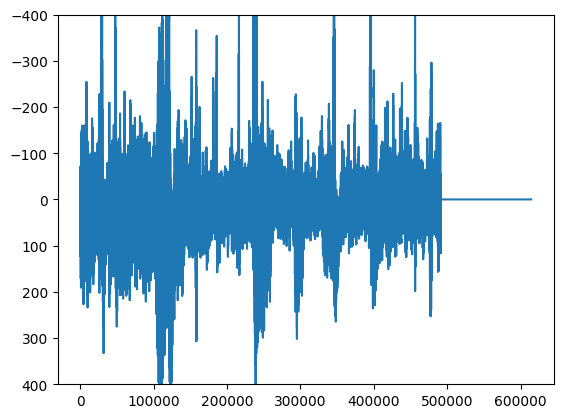

In [12]:
import matplotlib.pyplot as plt
chn_sig = edf_in.readSignal(1)
plt.plot(chn_sig)
plt.ylim([400,-400])

(400.0, -400.0)

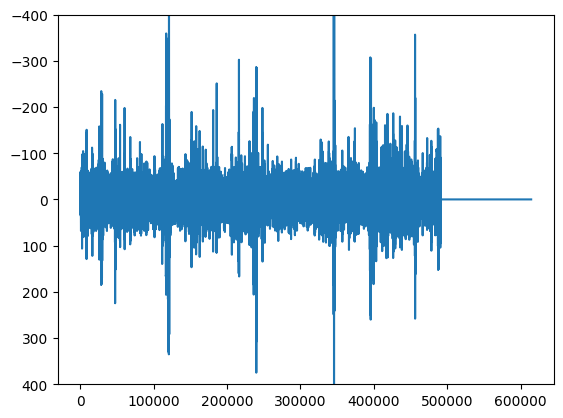

In [13]:
plt.plot(clean[0,:])
plt.ylim([400,-400])

(400.0, -400.0)

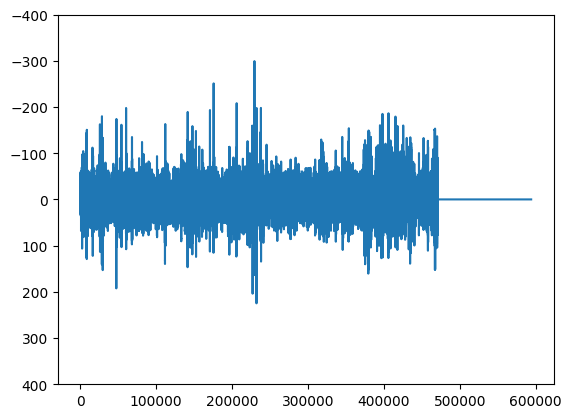

In [14]:
import matplotlib.pyplot as plt
plt.plot(interpolated[0,:])
plt.ylim([400,-400])

(400.0, -400.0)

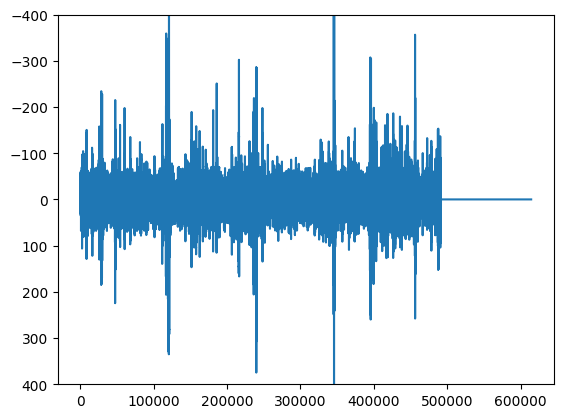

In [30]:
edf_clean = pyedflib.EdfReader(out_edf_path_clean)
chn_sig_clean = edf_clean.readSignal(0)
plt.plot(chn_sig_clean)
plt.ylim([400,-400])

In [29]:
edf_clean.close()

In [31]:
srate = edf_in.getSampleFrequencies()[0]/edf_in.datarecord_duration
srate

2048.0

In [32]:
srate = edf_clean.getSampleFrequencies()[0]/edf_clean.datarecord_duration
srate

2048.0

In [27]:
clean[0,:]/chn_sig_clean

array([-8.96438529e-06,  3.08801704e-01,  1.02291192e+00, ...,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00])

### Frequency domain plots

In [16]:
## Python's welch
import numpy as np
import scipy.io as sio
import scipy.fftpack
import scipy.signal
# create Hann window
winsize = int( 2*srate ) # 2-second window
hannw = .5 - np.cos(2*np.pi*np.linspace(0,1,winsize))/2

# number of FFT points (frequency resolution)
nfft = srate*100

In [17]:
# Find spectrums
f_orig, power_orig = scipy.signal.welch(chn_sig,fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)
f_clean, power_clean = scipy.signal.welch(clean[0,:],fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)
f_int, power_int = scipy.signal.welch(interpolated[0,:],fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)

(0.0, 100.0)

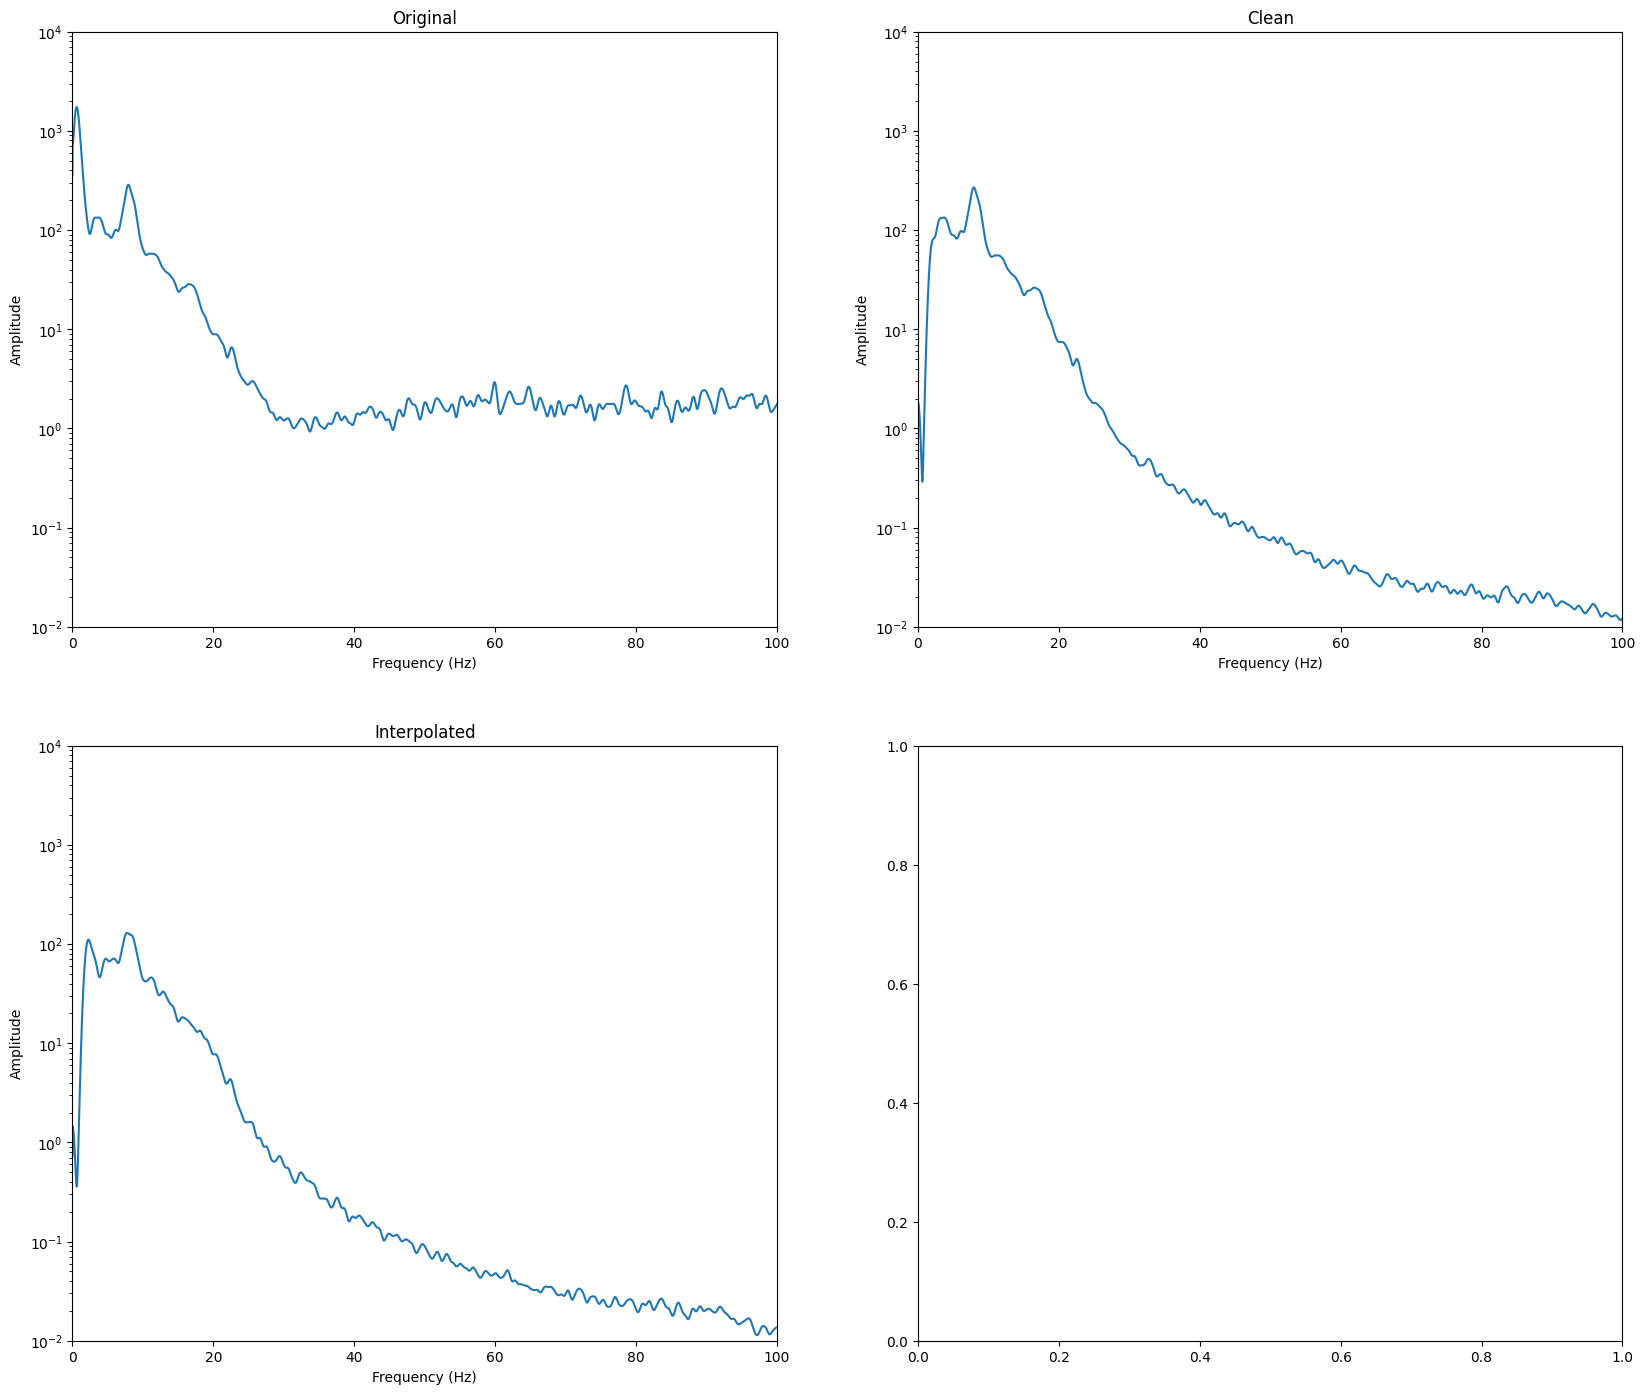

In [22]:
# With original noisy signal
import numpy as np
import scipy.signal
import scipy.fftpack
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 17))
# axs[0,0].plot(f_orig,10*np.log10(power_orig))
axs[0,0].semilogy(f_orig, power_orig)
axs[0,0].set_title('Original')
axs[0,0].set_xlabel('Frequency (Hz)')
axs[0,0].set_ylabel('Amplitude')
axs[0,0].set_ylim([10**-2,10**4])
axs[0,0].set_xlim([0,100])

# axs[0,1].plot(f_clean,10*np.log10(power_clean))
axs[0,1].semilogy(f_clean, power_clean)
axs[0,1].set_title('Clean')
axs[0,1].set_xlabel('Frequency (Hz)')
axs[0,1].set_ylabel('Amplitude')
axs[0,1].set_ylim([10**-2,10**4])
axs[0,1].set_xlim([0,100])

# axs[1,0].plot(f_int,10*np.log10(power_int))
axs[1,0].semilogy(f_int, power_int)
axs[1,0].set_title('Interpolated')
axs[1,0].set_xlabel('Frequency (Hz)')
axs[1,0].set_ylabel('Amplitude')
axs[1,0].set_ylim([10**-2,10**4])
axs[1,0].set_xlim([0,100])

In [34]:
edf_in.close()

In [ ]:
# Check files created

## Using Cleanline

In [ ]:
# Testing class
seegTF = cleanSEEG(edf_path, 
                   chn_csv_path, 
                   subject, 
                   subjects_dir, 
                   cleanPLI = True, 
                   methodPLI = 'Cleanline', 
                   lineFreq = 60,
                   bandwidth = 4,
                   noiseDetect = True,
                   highpass = [0.25, 0.75], 
                   maxFlatlineDuration = 5, 
                   trsfPath=trsfPath, # This is the only one I'm changing from default 
                   epoch_length=5,
                   processes = 8)

In [ ]:
clean, interpolated, df_epochs = seegTF.clean_epochs(return_interpolated=True)

In [ ]:
df_epochs

In [ ]:
interpolated.shape

In [ ]:
srate = 2048.0
614528 - int(srate*5)*4

In [ ]:
# Compare to orig signal
import pyedflib
edf_in = pyedflib.EdfReader('/home/mcesped/scratch/HippiEEGAtlas/epochs/results/sub-079/ses-002/ieeg/epoch.edf')

In [ ]:
import matplotlib.pyplot as plt
chn_sig = edf_in.readSignal(1)
plt.plot(chn_sig)
plt.ylim([400,-400])

In [ ]:
import matplotlib.pyplot as plt
plt.plot(clean[0,:])
plt.ylim([400,-400])

In [ ]:
plt.plot(interpolated[0,:])
plt.ylim([400,-400])

In [ ]:
## Python's welch
import numpy as np
import scipy.io as sio
import scipy.fftpack
import scipy.signal
# create Hann window
winsize = int( 2*srate ) # 2-second window
hannw = .5 - np.cos(2*np.pi*np.linspace(0,1,winsize))/2

# number of FFT points (frequency resolution)
nfft = srate*100

In [ ]:
# Find spectrums
f_orig, power_orig = scipy.signal.welch(chn_sig,fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)
f_clean, power_clean = scipy.signal.welch(clean[0,:],fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)
f_int, power_int = scipy.signal.welch(interpolated[0,:],fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)

In [ ]:
# With original noisy signal
import numpy as np
import scipy.signal
import scipy.fftpack
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 17))
# axs[0,0].plot(f_orig,10*np.log10(power_orig))
axs[0,0].semilogy(f_orig, power_orig)
axs[0,0].set_title('Original')
axs[0,0].set_xlabel('Frequency (Hz)')
axs[0,0].set_ylabel('Amplitude')
axs[0,0].set_ylim([10**-2,10**4])
axs[0,0].set_xlim([0,100])

# axs[0,1].plot(f_clean,10*np.log10(power_clean))
axs[0,1].semilogy(f_clean, power_clean)
axs[0,1].set_title('Clean')
axs[0,1].set_xlabel('Frequency (Hz)')
axs[0,1].set_ylabel('Amplitude')
axs[0,1].set_ylim([10**-2,10**4])
axs[0,1].set_xlim([0,100])

# axs[1,0].plot(f_int,10*np.log10(power_int))
axs[1,0].semilogy(f_int, power_int)
axs[1,0].set_title('Interpolated')
axs[1,0].set_xlabel('Frequency (Hz)')
axs[1,0].set_ylabel('Amplitude')
axs[1,0].set_ylim([10**-2,10**4])
axs[1,0].set_xlim([0,100])

In [ ]:
edf_in.close()

## Using Notch filtering

In [6]:
# Testing class with notch filtering
seegTF = cleanSEEG(edf_path, 
                   chn_csv_path, 
                   subject, 
                   subjects_dir, 
                   RmTrendMethod = 'HighPass',
                   cleanPLI = True, 
                   methodPLI = 'NotchFilter', 
                   lineFreq = 60,
                   bandwidth = 4,
                   n_harmonics = 3,
                   noiseDetect = True,
                   highpass = [0.25, 0.75], 
                   maxFlatlineDuration = 5, 
                   trsfPath=trsfPath, # This is the only one I'm changing from default 
                   epoch_length=5,
                   processes = 2)

In [ ]:
clean, interpolated, df_epochs = seegTF.clean_epochs(return_interpolated=True)

In [ ]:
df_epochs

In [ ]:
clean.shape #491521

In [ ]:
interpolated.shape

In [ ]:
srate = 2048.0
614528 - int(srate*5)*4

In [ ]:
# Compare to orig signal
import pyedflib
edf_in = pyedflib.EdfReader('/home/mcesped/scratch/HippiEEGAtlas/epochs/results/sub-079/ses-002/ieeg/epoch.edf')


In [ ]:
edf_in.getSignalLabels()[0:3]

In [ ]:
import matplotlib.pyplot as plt
chn_sig = edf_in.readSignal(1)
plt.plot(chn_sig)
plt.ylim([400,-400])

In [ ]:
import matplotlib.pyplot as plt
plt.plot(clean[0,:])
plt.ylim([400,-400])

In [ ]:
import matplotlib.pyplot as plt
plt.plot(interpolated[0,:])
plt.ylim([400,-400])

In [ ]:
## Python's welch
import numpy as np
import scipy.io as sio
import scipy.fftpack
import scipy.signal
# create Hann window
winsize = int( 2*srate ) # 2-second window
hannw = .5 - np.cos(2*np.pi*np.linspace(0,1,winsize))/2

# number of FFT points (frequency resolution)
nfft = srate*100

In [ ]:
# Find spectrums
f_orig, power_orig = scipy.signal.welch(chn_sig,fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)
f_clean, power_clean = scipy.signal.welch(clean[0,:],fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)
f_int, power_int = scipy.signal.welch(interpolated[0,:],fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)

In [ ]:
# With original noisy signal
import numpy as np
import scipy.signal
import scipy.fftpack
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 17))
# axs[0,0].plot(f_orig,10*np.log10(power_orig))
axs[0,0].semilogy(f_orig, power_orig)
axs[0,0].set_title('Original')
axs[0,0].set_xlabel('Frequency (Hz)')
axs[0,0].set_ylabel('Amplitude')
axs[0,0].set_ylim([10**-2,10**4])
axs[0,0].set_xlim([0,100])

# axs[0,1].plot(f_clean,10*np.log10(power_clean))
axs[0,1].semilogy(f_clean, power_clean)
axs[0,1].set_title('Clean')
axs[0,1].set_xlabel('Frequency (Hz)')
axs[0,1].set_ylabel('Amplitude')
axs[0,1].set_ylim([10**-2,10**4])
axs[0,1].set_xlim([0,100])

# axs[1,0].plot(f_int,10*np.log10(power_int))
axs[1,0].semilogy(f_int, power_int)
axs[1,0].set_title('Interpolated')
axs[1,0].set_xlabel('Frequency (Hz)')
axs[1,0].set_ylabel('Amplitude')
axs[1,0].set_ylim([10**-2,10**4])
axs[1,0].set_xlim([0,100])

## Rereference

In [1]:
from clean_seeg import cleanSEEG

In [ ]:
!pip install h5io

In [2]:
edf_path = '/home/mcesped/scratch/code/HippiEEGAtlas/epochs/results/sub-079/ses-002/ieeg/epoch.edf'
chn_csv_path = '/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/seega_coordinates/sub-P079/sub-P079_space-native_SEEGA.tsv'
subject ='sub-P079'
subjects_dir = '/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/fastsurfer/'
trsfPath = '/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/atlasreg/sub-P079/sub-P079_acq-noncontrast_desc-rigid_from-noncontrast_to-contrast_type-ras_xfm.txt'

In [3]:
# Testing class
seegTF = cleanSEEG(edf_path, 
                   chn_csv_path, 
                   subject, 
                   subjects_dir, 
                   cleanPLI = True, 
                   methodPLI = 'Zapline', 
                   lineFreq = 60,
                   bandwidth = 4,
                   noiseDetect = True,
                   highpass = [0.25, 0.75], 
                   maxFlatlineDuration = 5, 
                   trsfPath=trsfPath, # This is the only one I'm changing from default 
                   epoch_length=5,
                   processes = 4)

In [4]:
# rereference(self, aparc_aseg_path, out_edf_path, out_tsv_path):
aparc_aseg_path = '/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/fastsurfer/sub-P079/mri/aparc+aseg.orig.mgz'
out_edf_path = '/scratch/mcesped/code/sEEGPrep/Results/test.edf'
out_tsv_path = '/scratch/mcesped/code/sEEGPrep/Results/test.tsv'

In [5]:
df_cols = {
            'type': 'type',
            'label': 'label',
            'x': 'x',
            'y': 'y',
            'z': 'z',
            'group': 'orig_group'
        }

In [ ]:
seegTF.rereference(out_edf_path, write_tsv = False, out_tsv_path = out_tsv_path, df_cols = df_cols)

In [ ]:
df = seegTF.identify_regions(aparc_aseg_path,
                         use_reref = True,
                         write_tsv = True,
                         out_tsv_path = out_tsv_path,
                         df_cols = df_cols,
                         use_clean = False,
                         discard_wm_un = True,
                         write_edf = True,
                         out_edf_path = out_edf_path)

In [ ]:
df

In [6]:
df2 = seegTF.identify_regions(aparc_aseg_path,
                             use_reref = False,
                             write_tsv = True,
                             out_tsv_path = out_tsv_path,
                             df_cols = df_cols,
                             use_clean = False,
                             discard_wm_un = True,
                             write_edf = True,
                             out_edf_path = out_edf_path)

['type', 'label', 'x', 'y', 'z', 'orig_group']


len annot 3
len n_rem 4
['LMiLs7', 'LMiLs8', 'LMiLs9', 'RACg9', 'RACg10', 'RAOFr1', 'RAOFr5', 'RAOFr7', 'RAOFr9', 'RASSMA2', 'RASSMA3', 'RASSMA7', 'RASSMA8', 'RPLs9', 'RPLs10', 'RPOFr1', 'RPOFr9', 'RSLs1', 'RSLs3', 'RSLs4', 'RSLs6']
range(0, 21)
Channel part


In [ ]:
df2

In [ ]:
dicts

In [ ]:
clean, interpolated, df_epochs = seegTF.clean_epochs(use_rereference= Trreturn_interpolated=True)

## Downsampling

In [1]:
from clean_seeg import cleanSEEG

In [2]:
edf_path = '/home/mcesped/scratch/code/HippiEEGAtlas/epochs/results/sub-079/ses-002/ieeg/epoch.edf'
chn_csv_path = '/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/seega_coordinates/sub-P079/sub-P079_space-native_SEEGA.tsv'
subject ='sub-P079'
subjects_dir = '/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/fastsurfer/'
trsfPath = '/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/atlasreg/sub-P079/sub-P079_acq-noncontrast_desc-rigid_from-noncontrast_to-contrast_type-ras_xfm.txt'

In [4]:
# Testing class
seegTF = cleanSEEG(edf_path, 
                   chn_csv_path, 
                   subject, 
                   subjects_dir, 
                   cleanPLI = True, 
                   methodPLI = 'Zapline', 
                   lineFreq = 60,
                   bandwidth = 4,
                   noiseDetect = True,
                   highpass = [0.5, 1.5], #I set it to [0.5, 1.5] to improve comp cost
                   maxFlatlineDuration = 5, 
                   trsfPath=trsfPath, # This is the only one I'm changing from default 
                   epoch_length=5)

In [5]:
%%time
out_edf_dn = '/scratch/mcesped/code/sEEGPrep/Results/test_downsampled.edf'
signal_dsG, downsampledSrate = seegTF.downsample(target_srate=250, write_edf = True, out_edf_path = out_edf_dn)

len annot 3
len n_rem 4
Channel part
CPU times: user 1.6 s, sys: 1.01 s, total: 2.61 s
Wall time: 1min 54s


In [6]:
signal_dsG2 = signal_dsG
downsampledSrate2 = downsampledSrate

In [7]:
signal_dsG.shape

(149, 75016)

In [8]:
import pyedflib
edf_dn = pyedflib.EdfReader(out_edf_dn)

In [9]:
downsampledSrate = edf_dn.getSampleFrequencies()[0]/edf_dn.datarecord_duration
downsampledSrate

250.0

In [10]:
edf_dn.getSampleFrequencies()[0]

250

In [11]:
edf_dn.datarecord_duration

1.0

In [31]:
edf_dn.getSignalHeader(51)

{'label': 'RPLs1',
 'dimension': 'uV',
 'sample_rate': 250.0,
 'sample_frequency': 250.0,
 'physical_max': -8711.0,
 'physical_min': 8711.0,
 'digital_max': 32767,
 'digital_min': -32768,
 'prefilter': '',
 'transducer': ''}

In [13]:
import pyedflib
edf_in = pyedflib.EdfReader('/home/mcesped/scratch/code/HippiEEGAtlas/epochs/results/sub-079/ses-002/ieeg/epoch.edf')

In [32]:
edf_dn.getSignalHeader(51)

{'label': 'RPLs1',
 'dimension': 'uV',
 'sample_rate': 250.0,
 'sample_frequency': 250.0,
 'physical_max': -8711.0,
 'physical_min': 8711.0,
 'digital_max': 32767,
 'digital_min': -32768,
 'prefilter': '',
 'transducer': ''}

In [14]:
import numpy as np

In [15]:
srate = edf_in.getSampleFrequencies()[0]/edf_in.datarecord_duration
# downsampledSrate = downsampledSrate[0]

In [16]:
int(edf_in.datarecord_duration*100000)/100000

0.0625

In [50]:
chn_sig = edf_in.readSignal(15)
npnts = chn_sig.shape[-1]
t_orig = np.arange(0, npnts)/srate

In [26]:
# power spectrum (O = original)
import scipy.fftpack
hzO = np.linspace(0,srate/2,int(np.floor(npnts/2)+1))
signalO_pow = np.abs(scipy.fftpack.fft(chn_sig)/npnts)**2
signalO_pow = signalO_pow[:len(hzO)]

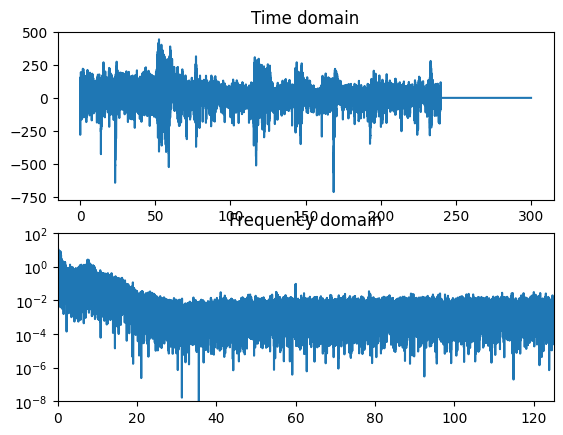

In [27]:
# time domain signal
import matplotlib.pyplot as plt
plt.subplot(211)
plt.plot(t_orig,chn_sig)
plt.title('Time domain')
## optional manual zoom:
#plt.xlim([0,1])


# show power spectrum
plt.subplot(212)
plt.plot(hzO,signalO_pow)
plt.yscale('log')
plt.xlim([0,125])
plt.ylim([10**-8,10**2])
plt.title('Frequency domain')
plt.show()

In [54]:
chn_sig_dn = edf_dn.readSignal(15)
npnts = chn_sig_dn.shape[-1]
t_dn = np.arange(0, npnts)/srate

In [41]:
# power spectrum (O = original)
hzO = np.linspace(0,downsampledSrate/2,int(np.floor(npnts/2)+1))
signalO_pow = np.abs(scipy.fftpack.fft(chn_sig_dn)/npnts)**2
signalO_pow = signalO_pow[:len(hzO)]

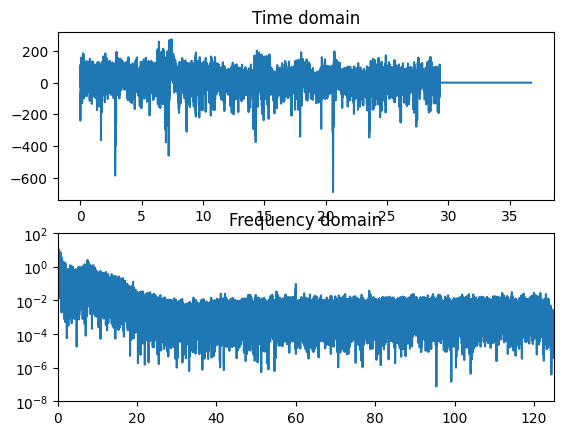

In [42]:
# time domain signal
plt.subplot(211)
plt.plot(t_dn,chn_sig_dn)
plt.title('Time domain')
## optional manual zoom:
#plt.xlim([0,1])

# show power spectrum
plt.subplot(212)
plt.plot(hzO,signalO_pow)
plt.yscale('log')
plt.xlim([0,125])
plt.ylim([10**-8,10**2])
plt.title('Frequency domain')
plt.show()

In [55]:
## Python's welch
import numpy as np
import scipy.io as sio
import scipy.fftpack
import scipy.signal
# create Hann window
winsize = int( 2*srate ) # 2-second window
hannw = .5 - np.cos(2*np.pi*np.linspace(0,1,winsize))/2

winsize2 = int( 2*downsampledSrate ) # 2-second window
hannw2 = .5 - np.cos(2*np.pi*np.linspace(0,1,winsize2))/2

# number of FFT points (frequency resolution)
nfft = srate*100
nfft_new = downsampledSrate*100

In [56]:
# Find spectrums
f_orig, power_orig = scipy.signal.welch(chn_sig,fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)
f_clean, power_clean = scipy.signal.welch(chn_sig_dn,fs=downsampledSrate,window=hannw2,nperseg=winsize2,noverlap=winsize2/4,nfft=nfft_new)

(0.0, 100.0)

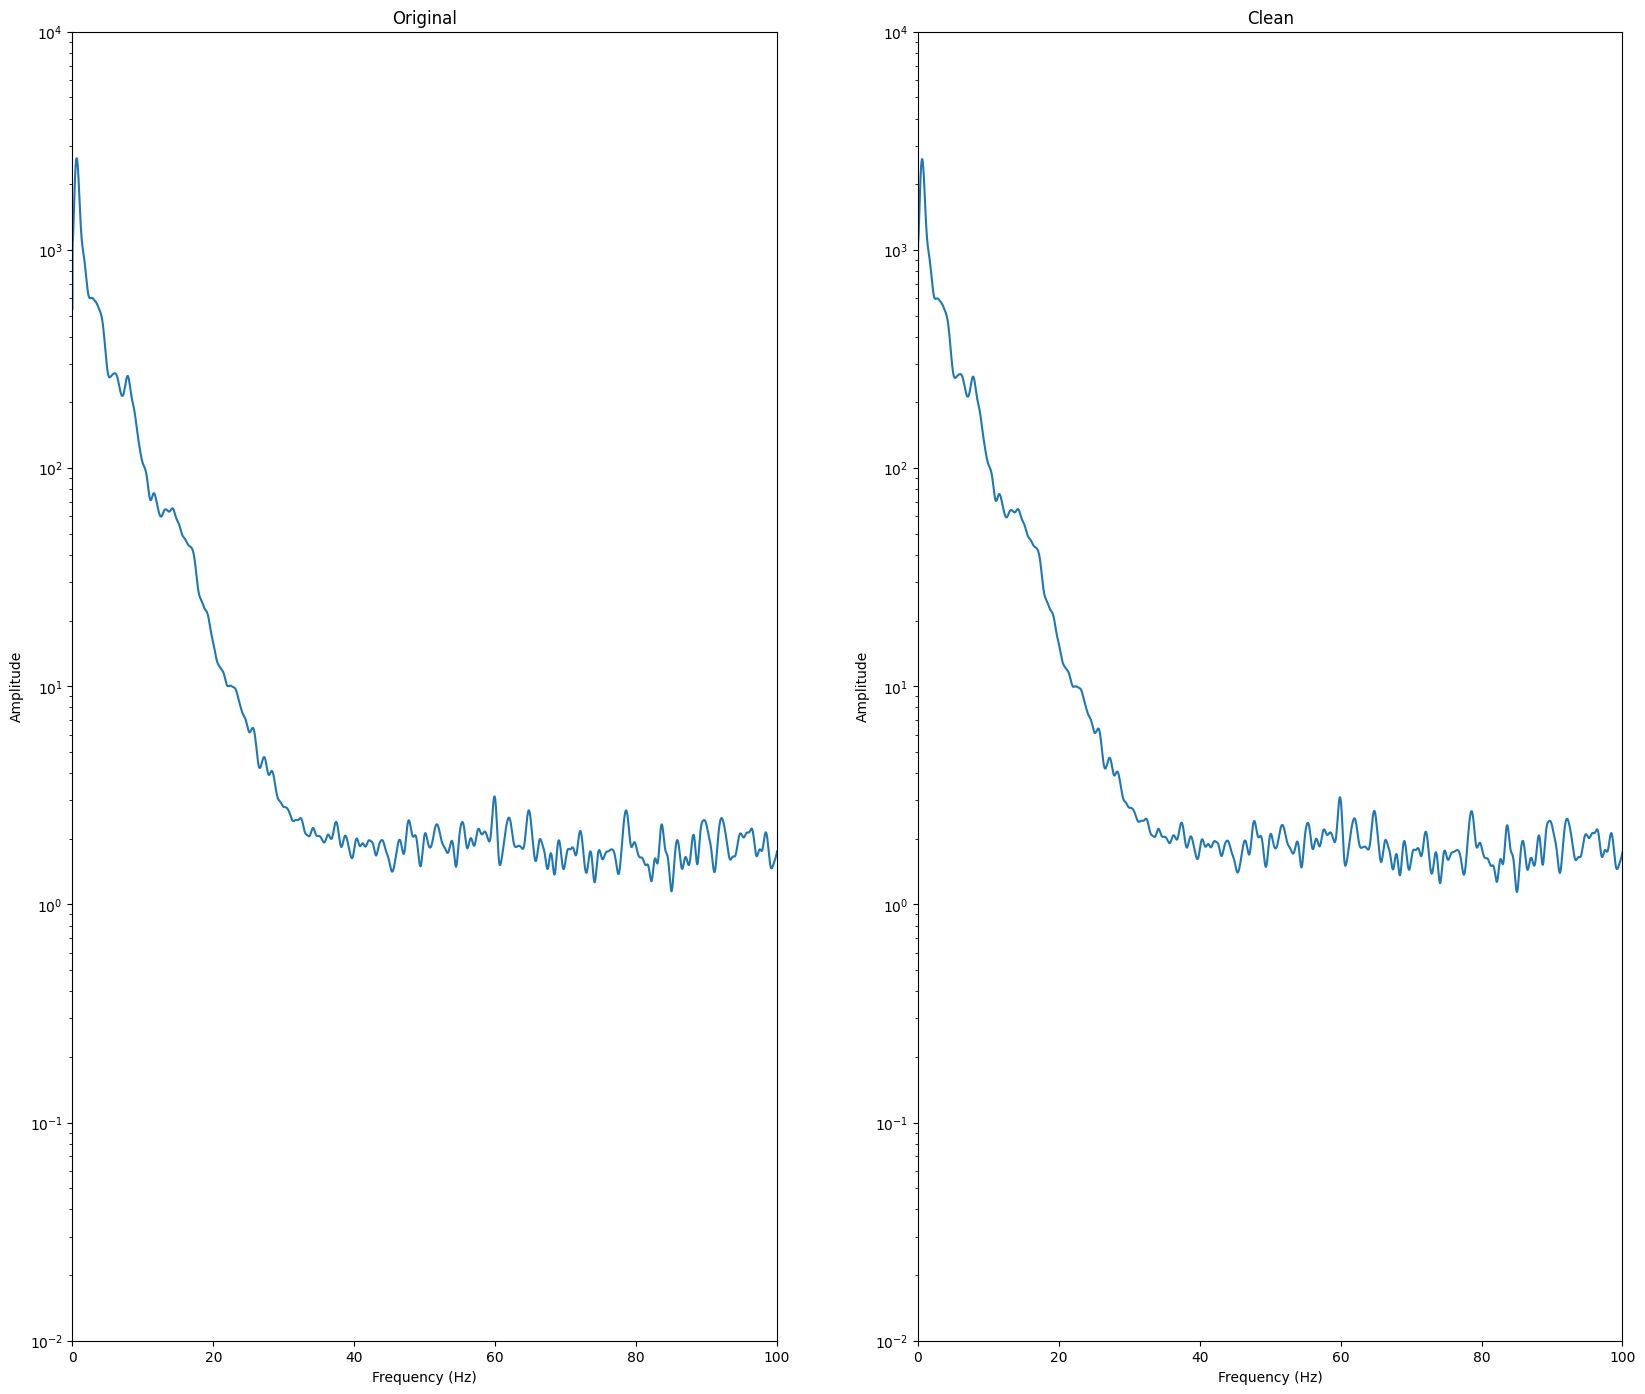

In [57]:
# With original noisy signal
import numpy as np
import scipy.signal
import scipy.fftpack
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 17))
# axs[0,0].plot(f_orig,10*np.log10(power_orig))
axs[0].semilogy(f_orig, power_orig)
axs[0].set_title('Original')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Amplitude')
axs[0].set_ylim([10**-2,10**4])
axs[0].set_xlim([0,100])

# axs[0,1].plot(f_clean,10*np.log10(power_clean))
axs[1].semilogy(f_clean, power_clean)
axs[1].set_title('Clean')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Amplitude')
axs[1].set_ylim([10**-2,10**4])
axs[1].set_xlim([0,100])

In [18]:
print(len(chn_sig))
print(len(signal_dsG))
print(len(signal_dsG)*2048/len(chn_sig))

614528
75016
250.0012497396376


In [24]:
len(edf_in.getSignalLabels())

149

In [22]:
edf_in.signals_in_file

149

In [44]:
edf_in.close()
edf_dn.close()

# Test workflow

In [1]:
import sys
sys.path.append('../')

In [2]:
from clean_seeg.clean_seeg import cleanSEEG

In [3]:
edf = '/home/mcesped/scratch/Datasets/bids_ieeg/Subj_space/sub-EPL31LHS0026/ses-V02SE06/ieeg/sub-EPL31LHS0026_ses-V02SE06_task-full_run-01_ieeg.edf'

### Extra testing

In [2]:
!pip install SimpleITK

Looking in links: /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo2020/avx2, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo/avx2, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo2020/generic, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo/generic, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/generic


In [3]:
edf_path = '/home/mcesped/scratch/code/HippiEEGAtlas/epochs/results/channel_only/bids/sub-097/ses-007/ieeg/sub-097_ses-007_task-full_run-01_ieeg_epoch.edf'
chn_csv_path = '/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/seega_coordinates/sub-P112/sub-P112_space-native_SEEGA.tsv'
subject ='sub-P084'
subjects_dir = '/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/fastsurfer/'
trsfPath = '/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/atlasreg/sub-P112/sub-P112_desc-rigid_from-noncontrast_to-contrast_type-ras_xfm.txt'
# trsfPath = '/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/atlasreg/sub-P084/sub-P084_acq-noncontrast_desc-rigid_from-noncontrast_to-contrast_type-ras_xfm.txt'

In [5]:
import pyedflib
import numpy as np

In [6]:
f = pyedflib.EdfReader(edf)

In [7]:
f.samples_in_datarecord(0)

128

In [8]:
f.datarecord_duration

0.0625

In [9]:
idx = f.readAnnotations()[2].tolist().index('awake trigger')
timestamp = f.readAnnotations()[0][idx]
timestamp

24225.3271484

In [10]:
srate = f.getSampleFrequencies()[0]/f.datarecord_duration
N = f.getNSamples()[0]
t = np.arange(0, N)/srate
print(srate, N)

2048.0 176876160


In [29]:
t_init_id = np.abs(np.subtract(t,timestamp)).argmin()
t_end_id = int(np.floor(t_init_id+240*srate+1)) # TODO: customizable
t_ids = (t_init_id, t_end_id)

In [70]:
t[t_ids[0]]

18741.667

In [30]:
n_val = t_ids[1]-t_ids[0]

In [31]:
n_val

480001

In [33]:
signal = f1.readSignal(1, start=t_ids[0], n=n_val)
signal

array([-5785.14508217, -5715.87347005, -5737.84929183, ...,
       -5744.53758541, -5728.77232197, -5722.56176364])

In [ ]:
plotAllChannels_time(t_orig, signal.reshape(1,-1), ['LAm3-4'], flipped=True, out_path=None, show_fig = True, fig=None)

In [11]:
# Try EDFlib
f = EDFreader(edf)

In [12]:
f.getPatientGender()

''

In [44]:
f.getSampelsPerDataRecord(0)

200

In [43]:
dbuf = np.empty(n_val, dtype = np.float_)
f.fseek(1, t_ids[0], EDFreader.EDFSEEK_SET)
f.readSamples(1, dbuf, n_val)
dbuf

array([-5785.14508217, -5715.87347005, -5737.84929183, ...,
       -5744.53758541, -5728.77232197, -5722.56176364])

In [11]:
f.close()

### Plotting function

In [24]:
import scipy
import scipy.io as sio
import scipy.fftpack
import scipy.signal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def welchMethod(data, srate):
    # create Hann window
    winsize = int( 2.0*srate ) # 2-second window
    hannw = .5 - np.cos(2*np.pi*np.linspace(0,1,winsize))/2

    # number of FFT points (frequency resolution)
    spectres = 0.01; # Hz
    nfft = int(srate/spectres)
    # print('hihi')
    # Apply Welch method
    f, welchpow = scipy.signal.welch(data,fs=srate,window=hannw,
                                    nperseg=winsize,noverlap=winsize/2,nfft=nfft, scaling='density')
    # print(welchpow.shape)
    # Normalizing
    if welchpow.ndim > 1:
        welchpow = np.divide(welchpow, np.sqrt(np.sum(welchpow**2, axis=1)).reshape(welchpow.shape[0],1))
    else:
        welchpow = np.divide(welchpow, np.sqrt(np.sum(welchpow**2)))
    return f, welchpow

In [26]:
def plotAllChannels(freq, welchpow, out_path=None, output=False, show_fig = False, ax=None):
    x_val = [0.5, 4, 8, 13, 30, 80]
    default_x_ticks = range(len(x_val))
    if ax == None:
        fig, ax = plt.subplots()
    ax.semilogx(freq,welchpow)
    ax.semilogx([4, 4], [0, 0.12], '--k')
    ax.semilogx([8, 8], [0, 0.12], '--k')
    ax.semilogx([13, 13], [0, 0.12], '--k')
    ax.semilogx([30, 30], [0, 0.12], '--k')
    ax.set_xticks(x_val)
    ax.set_xticklabels(x_val)
    ax.set_xlim([0.5,80])
    ax.set_ylim([0, 0.12])
    ax.set_xlabel('Frequency [Hz]')
    ax.set_ylabel('Normalized PSD')
    # Add labels
    ax.text(1.5, 0.11, r'$\delta $')
    ax.text(5.5, 0.11, r'$\theta $')
    ax.text(9.5, 0.11, r'$\alpha $')
    ax.text(18, 0.11, r'$\beta $')
    ax.text(45, 0.11, r'$\gamma $')
    if output:
        fig.savefig(out_path)
    if show_fig:
        plt.show()
    elif show_fig == 'Close':
        plt.close()

In [27]:
import plotly.graph_objects as go
def plotAllChannels_time(time, signal, identifier, flipped=True, out_path=None, show_fig = False, fig=None):
    layout = go.Layout(
        xaxis=dict(
            rangeslider=dict(
                visible = True,
                range=[0, np.max(time)]
            ),
            type='linear'
        )
    )
    if fig == None:
        fig = go.Figure(layout=layout)
    visible = True
    for idx in range(signal.shape[0]):
        fig.add_trace(go.Scatter(x=time,y=signal[idx,:], name=identifier[idx], visible=visible))
        visible = 'legendonly'
    
    fig.update_layout(
    xaxis_title='Time [s]',
    yaxis_title='Amplitude [uV]')
    # Add dropdown
    fig.update_layout(
        updatemenus=[
            dict(
                type = "buttons",
                direction = "left",
                buttons=list([
                    dict(
                        args=["xaxis.range", (0,5)],
                        label="5s",
                        method="relayout"
                    ),
                    dict(
                        args=["xaxis.range", (0,10)],
                        label="10s",
                        method="relayout"
                    ),
                    dict(
                        args=["xaxis.range", (0,np.max(time))],
                        label="all",
                        method="relayout"
                    )
                ]),
                pad={"r": 10, "t": 10},
                showactive=True,
                x=0.05,
                xanchor="left",
                y=1.14,
                yanchor="top"
            ),
        ]
    )

    # Add annotation
    fig.update_layout(
        annotations=[
            dict(text="Time range:", showarrow=False,
                                 x=0, y=1.08, yref="paper", align="left")
        ]
    )
    if flipped:
        fig.update_yaxes(autorange="reversed")
    if out_path != None:
        fig.write_html(out_path, include_mathjax='cdn')
    if show_fig:
        fig.show()
    else: 
        fig.data = []

### Epoch extraction

In [3]:
# Testing class
seegTF = cleanSEEG(edf,
                  processes = 8)

In [4]:
import os
tmp = os.environ.get('SLURM_TMPDIR')

In [5]:
tmp

'/localscratch/mcesped.19607563.0'

In [6]:
out_root = '/scratch/mcesped/Results/tmp_seeg'

In [7]:
%%time
report_epochs = seegTF.extract_epochs(event_start='awake trigger',
                      event_dur = 60*4, # 4 minutes
                       out_root=out_root,
                       tmpdir = tmp,
                    return_report=True)

here
/scratch/mcesped/Results/tmp_seeg/sub-EPL31LHS0026_ses-V02SE06_task-full_rec-clip_run-01_clip-01_ieeg.edf
aqui
2022-10-30 12:32:23.542529
delete
CPU times: user 50.1 s, sys: 8min 13s, total: 9min 3s
Wall time: 1h 19min 44s


In [ ]:
report_epochs

In [8]:
import pyedflib
edf_epoch_file = '/scratch/mcesped/Results/tmp_seeg/sub-EPL31LHS0026_ses-V02SE06_task-full_rec-clip_run-01_clip-01_ieeg.edf'
#'/scratch/mcesped/Results/tmp_seeg/sub-068_ses-005_task-full_rec-clip_run-01_clip-01_ieeg.edf'
edf_epoch = pyedflib.EdfReader(edf_epoch_file)

In [9]:
edf_epoch.getLabel(12)

'LPCg2'

In [10]:
orig_srate = edf_epoch.getSampleFrequencies()[0]/edf_epoch.datarecord_duration
orig_srate

2048.0

In [11]:
idx = edf_epoch.getSignalLabels().index('LPIn2')
chn_sig = edf_epoch.readSignal(idx)

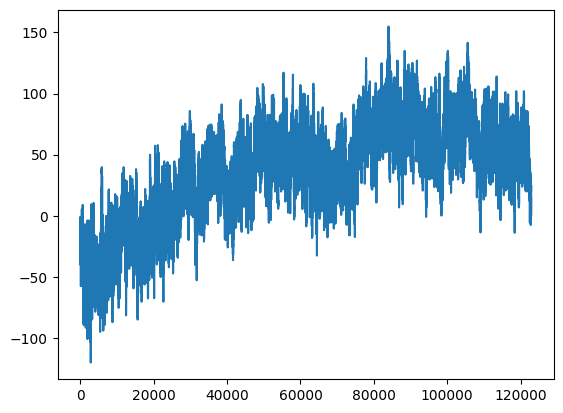

In [12]:
import matplotlib.pyplot as plt
plt.plot(chn_sig[0:2048*60])

In [10]:
# Measurement date
print(edf_epoch.getStartdatetime())

2022-10-31 11:50:33


In [11]:
edf_epoch.starttime_subsecond

0

In [20]:
header=edf_epoch.getHeader()

In [21]:
header['startdate']

datetime.datetime(2022, 10, 31, 11, 50, 33)

In [12]:
len(chn_sig)/orig_srate

240.0

In [17]:
f, psd = welchMethod(chn_sig, orig_srate)

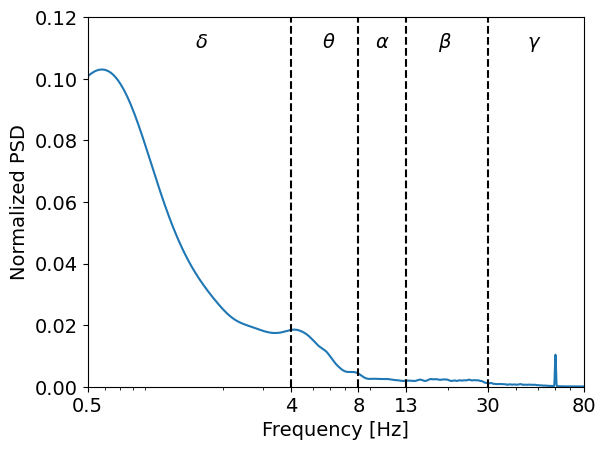

In [18]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots()
plotAllChannels(f.T, psd.T, show_fig=False, ax=ax)
plt.show()

In [14]:
edf_epoch.close()

In [20]:
# Read original EDF

In [21]:
import pyedflib
edf_orig = pyedflib.EdfReader(edf)

In [22]:
header=edf_orig.getHeader()

In [23]:
print(header['startdate']), header['startdate']

2022-10-31 07:30:20.002832


(None, datetime.datetime(2022, 10, 31, 7, 30, 20, 2832))

In [24]:
import datetime
delta = datetime.timedelta(seconds=15613.8608398)
print(header['startdate']+delta)
header['startdate']+delta

2022-10-31 11:50:33.863672


datetime.datetime(2022, 10, 31, 11, 50, 33, 863672)

In [25]:
edf_orig.readAnnotations()[2].tolist().index('awake trigger')

10

In [26]:
edf_orig.readAnnotations()[0][10]*2048, edf_orig.readAnnotations()[0][10]

(31977186.9999104, 15613.8608398)

In [27]:
# Measurement date
edf_orig.getStartdatetime().strftime('%d/%m/%y %H:%M:%S.%f')

'31/10/22 07:30:20.002832'

In [28]:
edf_orig.getLabel(12)

'LPCg2'

In [29]:
idx = edf_orig.getSignalLabels().index('LPCg2')
# chn_sig = edf_orig.readSignal(idx, start =49613470, n = 1229000)
chn_sig = edf_orig.readSignal(idx, start = 31977187, n = 2048*240)

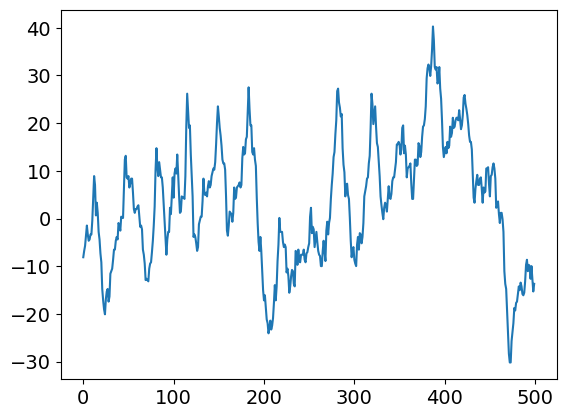

In [30]:
plt.plot(chn_sig[0:500])

In [31]:
edf_orig.close()

### Downsampling

In [19]:
# Testing class
edf_epoch_file = '/scratch/mcesped/Results/tmp_seeg/sub-EPL31LHS0026_ses-V02SE06_task-full_rec-clip_run-01_clip-01_ieeg.edf'
seegTF = cleanSEEG(edf_epoch_file, 
                   processes = 8)

In [4]:
out_edf_dn = '/scratch/mcesped/Results/tmp_seeg/sub-EPL31LHS0026_ses-V02SE06_task-full_rec-dn_run-01_clip-01_ieeg.edf'
chn_csv_path = '/scratch/mcesped/Datasets/bids_ieeg/Subj_space/sub-EPL31LHS0026/ses-V02SE07/ieeg/sub-EPL31LHS0026_ses-V02SE07_task-full_run-01_channels.tsv'

In [21]:
%%time
signal_dsG, dn_report = seegTF.downsample(chn_csv_path, target_srate=200, write_edf = True, out_edf_path = out_edf_dn, return_report=True)

len annot 3
Channel part
CPU times: user 1.32 s, sys: 611 ms, total: 1.93 s
Wall time: 13.1 s


In [22]:
dn_report.head()

,Original sampling rate,Target sampling rate,New sampling rate,Discarded channels
0,2048.0,200,200.0,"[Patient Event, C149, C150, C151, C152, C153, ..."


### Test downsampling

In [6]:
import pyedflib
edf_dn = pyedflib.EdfReader(out_edf_dn)

In [7]:
edf_dn.getSignalLabels()[0:17]

['LOFr1',
 'LOFr2',
 'LOFr3',
 'LOFr4',
 'LOFr5',
 'LOFr6',
 'LOFr7',
 'LOFr8',
 'LOFr9',
 'LOFr10',
 'LPCg1',
 'LPCg2',
 'LPCg3',
 'LPCg4',
 'LPCg5',
 'LPCg6',
 'LPCg7']

In [8]:
edf_dn.getLabel(27)

'LAm8'

In [9]:
downsampledSrate = edf_dn.getSampleFrequencies()[0]/edf_dn.datarecord_duration
downsampledSrate

1024.0

In [10]:
import pyedflib
edf_in = pyedflib.EdfReader(edf_epoch_file)

In [11]:
edf_in.getSignalLabels()[0:17]

['Patient Event',
 'LOFr1',
 'LOFr2',
 'LOFr3',
 'LOFr4',
 'LOFr5',
 'LOFr6',
 'LOFr7',
 'LOFr8',
 'LOFr9',
 'LOFr10',
 'LPCg1',
 'LPCg2',
 'LPCg3',
 'LPCg4',
 'LPCg5',
 'LPCg6']

In [12]:
import numpy as np

In [13]:
srate = edf_in.getSampleFrequencies()[0]/edf_in.datarecord_duration
srate
# downsampledSrate = downsampledSrate[0]

2048.0

In [14]:
chn_sig = edf_in.readSignal(28)
npnts = chn_sig.shape[-1]
t_orig = np.arange(0, npnts)/srate

In [15]:
# power spectrum (O = original)
import scipy.fftpack
hzO = np.linspace(0,srate/2,int(np.floor(npnts/2)+1))
signalO_pow = np.abs(scipy.fftpack.fft(chn_sig)/npnts)**2
signalO_pow = signalO_pow[:len(hzO)]

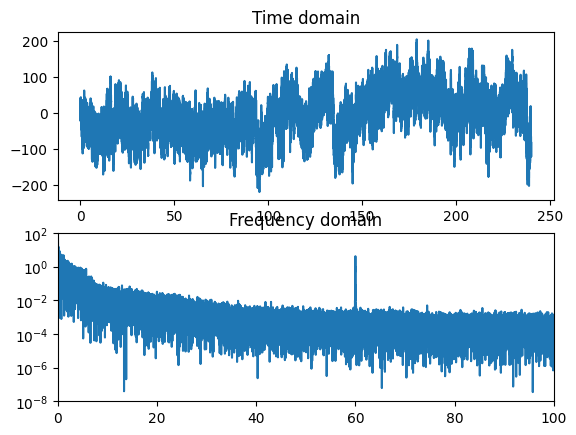

In [16]:
# time domain signal
import matplotlib.pyplot as plt
plt.subplot(211)
plt.plot(t_orig,chn_sig)
plt.title('Time domain')
## optional manual zoom:
#plt.xlim([0,1])


# show power spectrum
plt.subplot(212)
plt.plot(hzO,signalO_pow)
plt.yscale('log')
plt.xlim([0,100])
plt.ylim([10**-8,10**2])
plt.title('Frequency domain')
plt.show()

In [17]:
chn_sig_dn = edf_dn.readSignal(27)
npnts = chn_sig_dn.shape[-1]
t_dn = np.arange(0, npnts)/srate

In [19]:
downsampledSrate

1024.0

In [20]:
# power spectrum (O = original)
hzO = np.linspace(0,downsampledSrate/2,int(np.floor(npnts/2)+1))
signalO_pow = np.abs(scipy.fftpack.fft(chn_sig_dn)/npnts)**2
signalO_pow = signalO_pow[:len(hzO)]

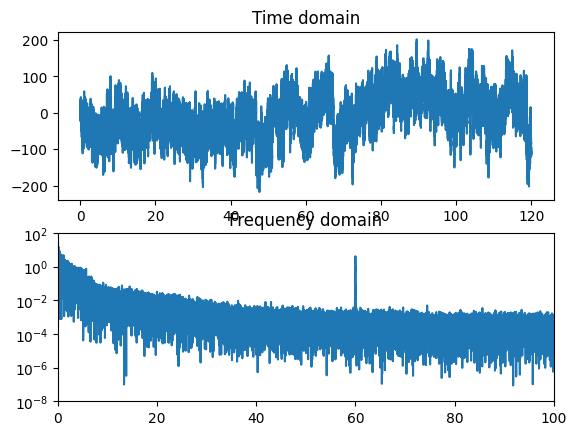

In [21]:
# time domain signal
plt.subplot(211)
plt.plot(t_dn,chn_sig_dn)
plt.title('Time domain')
## optional manual zoom:
#plt.xlim([0,1])

# show power spectrum
plt.subplot(212)
plt.plot(hzO,signalO_pow)
plt.yscale('log')
plt.xlim([0,100])
plt.ylim([10**-8,10**2])
plt.title('Frequency domain')
plt.show()

In [22]:
## Python's welch
import numpy as np
import scipy.io as sio
import scipy.fftpack
import scipy.signal
# create Hann window
winsize = int( 2*srate ) # 2-second window
hannw = .5 - np.cos(2*np.pi*np.linspace(0,1,winsize))/2

winsize2 = int( 2*downsampledSrate ) # 2-second window
hannw2 = .5 - np.cos(2*np.pi*np.linspace(0,1,winsize2))/2

# number of FFT points (frequency resolution)
nfft = srate*100
nfft_new = downsampledSrate*100

In [23]:
# Find spectrums
f_orig, power_orig = scipy.signal.welch(chn_sig,fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)
f_clean, power_clean = scipy.signal.welch(chn_sig_dn,fs=downsampledSrate,window=hannw2,nperseg=winsize2,noverlap=winsize2/4,nfft=nfft_new)

(0.0, 100.0)

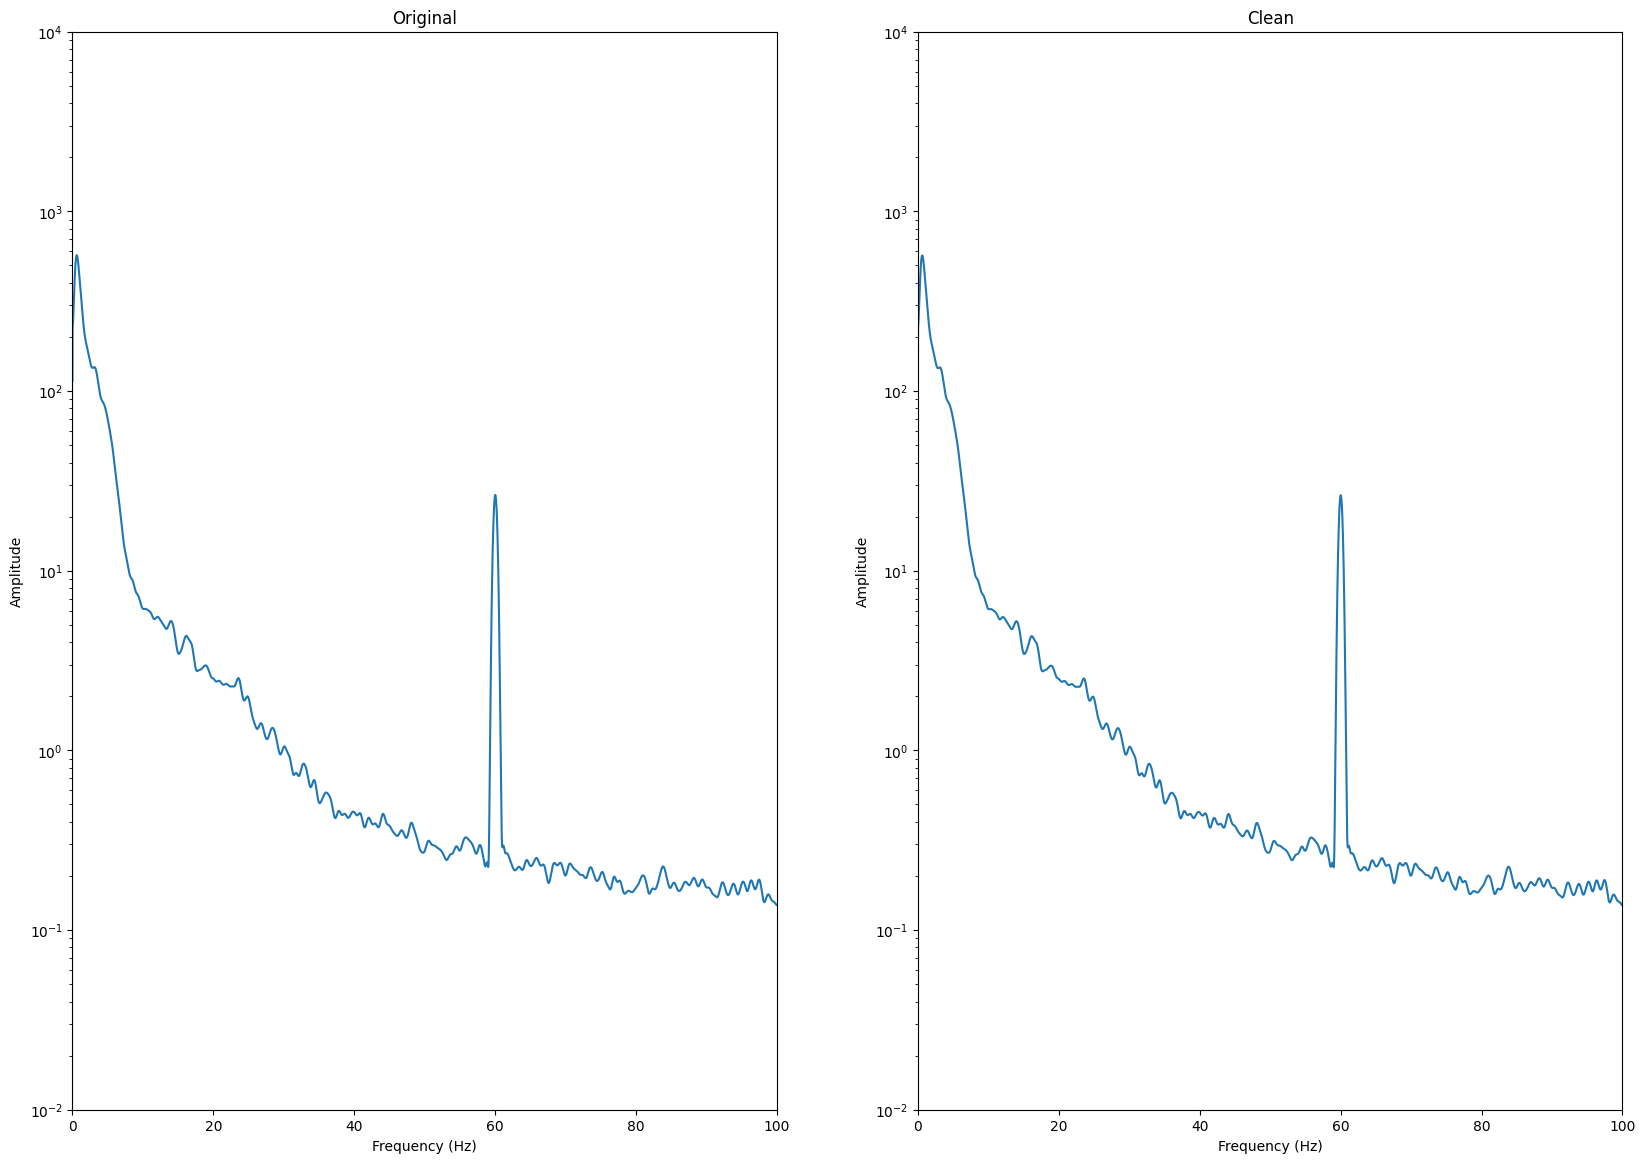

In [24]:
# With original noisy signal
import numpy as np
import scipy.signal
import scipy.fftpack
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 14))
# axs[0,0].plot(f_orig,10*np.log10(power_orig))
axs[0].semilogy(f_orig, power_orig)
axs[0].set_title('Original')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Amplitude')
axs[0].set_ylim([10**-2,10**4])
axs[0].set_xlim([0,100])

# axs[0,1].plot(f_clean,10*np.log10(power_clean))
axs[1].semilogy(f_clean, power_clean)
axs[1].set_title('Clean')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Amplitude')
axs[1].set_ylim([10**-2,10**4])
axs[1].set_xlim([0,100])

In [25]:
## Test frequency. We have to test through time points as we cannot be sure that they will end on the same time point.
t = np.arange(0, len(chn_sig))/srate
newTime = np.arange(0, len(chn_sig_dn))/downsampledSrate
newTime = newTime[newTime<=t[-1]]
print(len(t))
print(len(newTime))
print(len(newTime)*2048.0/len(t))

491520
245760
1024.0


In [14]:
### Extra tests

In [32]:
idx = edf_dn.getSignalLabels().index('LPHc1')
chn_sig = edf_dn.readSignal(idx)
f, psd = welchMethod(chn_sig, downsampledSrate)

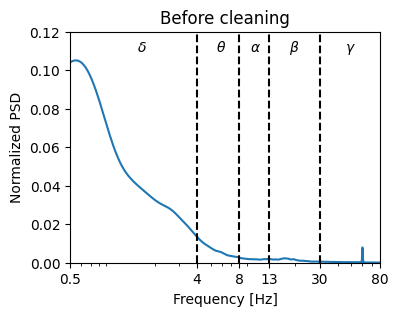

In [33]:
fig, ax = plt.subplots(figsize=(4,3))
plotAllChannels(f.T, psd.T, show_fig=False, ax=ax)
ax.set_title('Before cleaning')
plt.show()

In [26]:
edf_dn.close()
edf_in.close()

### Filtering

In [29]:
chn_csv_path = '/scratch/mcesped/Datasets/bids_ieeg/Subj_space/sub-EPL31LHS0026/ses-V02SE06/ieeg/sub-EPL31LHS0026_ses-V02SE06_task-full_run-01_channels.tsv'

In [24]:
# First perform cleaning 
# Testing class with highpass filtering
seegTF = cleanSEEG(out_edf_dn, # Using downsampled edf
                   RmTrendMethod = 'HighPass',
                   noiseDetect = False,
                   highpass = [0.1, 0.2], 
                   tfm= [],#trsfPath, # This is the only one I'm changing from default 
                   epoch_autoreject=5,
                   processes = 4)

In [5]:
# Linear detrend
seegTF = cleanSEEG(out_edf_dn, # Using downsampled edf
                   RmTrendMethod = 'LinearDetrend',
                   noiseDetect = False,
                   tfm= [],#trsfPath, # This is the only one I'm changing from default 
                   processes = 4)

In [8]:
# Demeaning
seegTF = cleanSEEG(out_edf_dn, # Using downsampled edf
                   RmTrendMethod = 'Demean',
                   noiseDetect = False,
                   tfm= [],#trsfPath, # This is the only one I'm changing from default 
                   processes = 4)

In [9]:
out_edf_path_clean = '/scratch/mcesped/Results/tmp_seeg/sub-EPL31LHS0026_ses-V02SE06_task-full_rec-demean_run-01_clip-01_ieeg.edf'
# out_edf_path_int = '/scratch/mcesped/code/sEEGPrep/Results/test_int.edf'

In [10]:
%%time
clean, df_report_filt, report_filt = seegTF.clean_epochs(chn_csv_path,
                            subject = None, 
                                      subjects_dir = None,
                                      return_interpolated=False, 
                                      write_edf_clean = True,
                                      out_edf_path_clean = out_edf_path_clean,
                                      verbose = False
                                    )

(148, 48000)
Removing trend
(148, 48000)
len annot 3
Channel part
CPU times: user 1.27 s, sys: 286 ms, total: 1.55 s
Wall time: 1.82 s


In [31]:
df_report_filt.head()

,Channel,Original mean,New mean
0,LOFr1,23.048090,-0.003911
1,LOFr2,47.710055,0.014432
2,LOFr3,33.249603,-0.028246
3,LOFr4,10.846786,0.008863
4,LOFr5,10.146899,-0.106224


In [32]:
report_filt

{'Method used': 'HighPass',
 'Discarded channels': [],
 'Transition band (Hz)': [0.1, 0.2]}

### Some checking on the filtering

In [11]:
# Compare to orig signal
import pyedflib
edf_in = pyedflib.EdfReader(out_edf_dn)


In [12]:
ch = 'LPCg2'
num_ch = edf_in.getSignalLabels().index(ch)

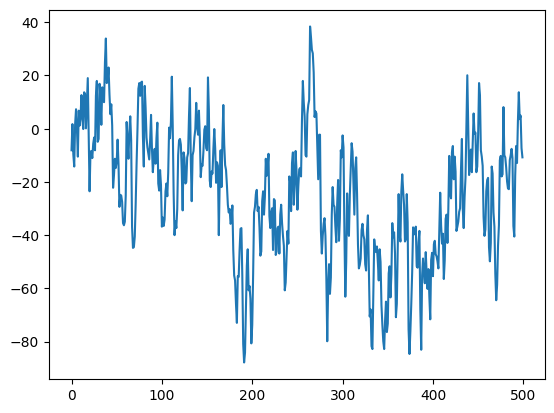

In [21]:
import matplotlib.pyplot as plt
plt.close('all')
%matplotlib inline
chn_sig = edf_in.readSignal(num_ch)
plt.plot(chn_sig[0:500])
# plt.ylim([400,-400])
plt.show()

In [22]:
import numpy as np
np.mean(chn_sig)

-2.9617034466315686

In [23]:
edf_clean = pyedflib.EdfReader(out_edf_path_clean)

In [24]:
print(edf_clean.getSignalLabels())

['LOFr1', 'LOFr2', 'LOFr3', 'LOFr4', 'LOFr5', 'LOFr6', 'LOFr7', 'LOFr8', 'LOFr9', 'LOFr10', 'LPCg1', 'LPCg2', 'LPCg3', 'LPCg4', 'LPCg5', 'LPCg6', 'LPCg7', 'LPCg8', 'LPCg9', 'LPCg10', 'LAm1', 'LAm2', 'LAm3', 'LAm4', 'LAm5', 'LAm6', 'LAm7', 'LAm8', 'LAm9', 'LAm10', 'LAHc1', 'LAHc2', 'LAHc3', 'LAHc4', 'LAHc5', 'LAHc6', 'LAHc7', 'LAHc8', 'LAHc9', 'LAHc10', 'LPHc1', 'LPHc2', 'LPHc3', 'LPHc4', 'LPHc5', 'LPHc6', 'LPHc7', 'LPHc8', 'LPHc9', 'LPHc10', 'LTePo1', 'LTePo2', 'LTePo3', 'LTePo4', 'LTePo5', 'LTePo6', 'LTePo7', 'LTePo8', 'LTePo9', 'LTePo10', 'LAIn1', 'LAIn2', 'LAIn3', 'LAIn4', 'LAIn5', 'LAIn6', 'LAIn7', 'LAIn8', 'LAIn9', 'LAIn10', 'LPIn1', 'LPIn2', 'LPIn3', 'LPIn4', 'LPIn5', 'LPIn6', 'LPIn7', 'LPIn8', 'LPIn9', 'LPIn10', 'ROFr1', 'ROFr2', 'ROFr3', 'ROFr4', 'ROFr5', 'ROFr6', 'ROFr7', 'ROFr8', 'ROFr9', 'ROFr10', 'RPCg1', 'RPCg2', 'RPCg3', 'RPCg4', 'RPCg5', 'RPCg6', 'RPCg7', 'RPCg8', 'RPCg9', 'RPCg10', 'RAm1', 'RAm2', 'RAm3', 'RAm4', 'RAm5', 'RAm6', 'RAm7', 'RAm8', 'RAm9', 'RAm10', 'RAHc1',

In [25]:
id_ch = edf_clean.getSignalLabels().index(ch)

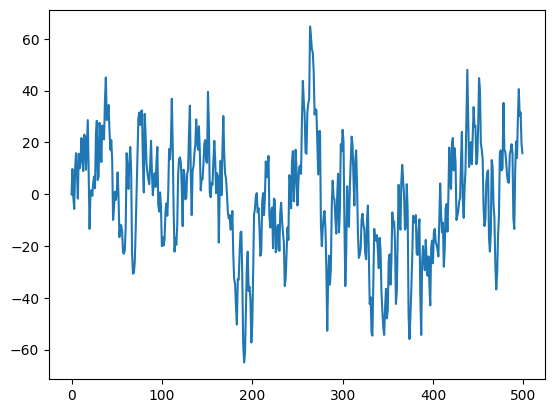

In [26]:
chn_sig_clean = edf_clean.readSignal(id_ch)
plt.plot(chn_sig_clean[0:500])
# plt.ylim([400,-400])

In [27]:
# Result for demean test
np.mean(chn_sig_clean) # Mean set to zero!!

0.022917854327204185

In [28]:
edf_clean.signals_in_file

148

In [90]:
# plt.plot(clean[id_ch,:])
# plt.ylim([400,-400])

In [29]:
## Python's welch
import numpy as np
import scipy.io as sio
import scipy.fftpack
import scipy.signal
srate = edf_in.getSampleFrequencies()[0]/edf_in.datarecord_duration
new_srate = edf_clean.getSampleFrequencies()[0]/edf_clean.datarecord_duration
# create Hann window
winsize = int( 2*srate ) # 2-second window
hannw = .5 - np.cos(2*np.pi*np.linspace(0,1,winsize))/2

winsize2 = int( 2*new_srate ) # 2-second window
hannw2 = .5 - np.cos(2*np.pi*np.linspace(0,1,winsize2))/2

# number of FFT points (frequency resolution)
nfft = srate*100

In [30]:
# Find spectrums
f_orig, power_orig = scipy.signal.welch(chn_sig,fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)
f_clean, power_clean = scipy.signal.welch(chn_sig_clean,fs=new_srate,window=hannw2,nperseg=winsize2,noverlap=winsize2/4,nfft=nfft)
# f_int, power_int = scipy.signal.welch(interpolated[id_ch,:],fs=new_srate,window=hannw2,nperseg=winsize2,noverlap=winsize2/4,nfft=nfft)

(0.0, 80.0)

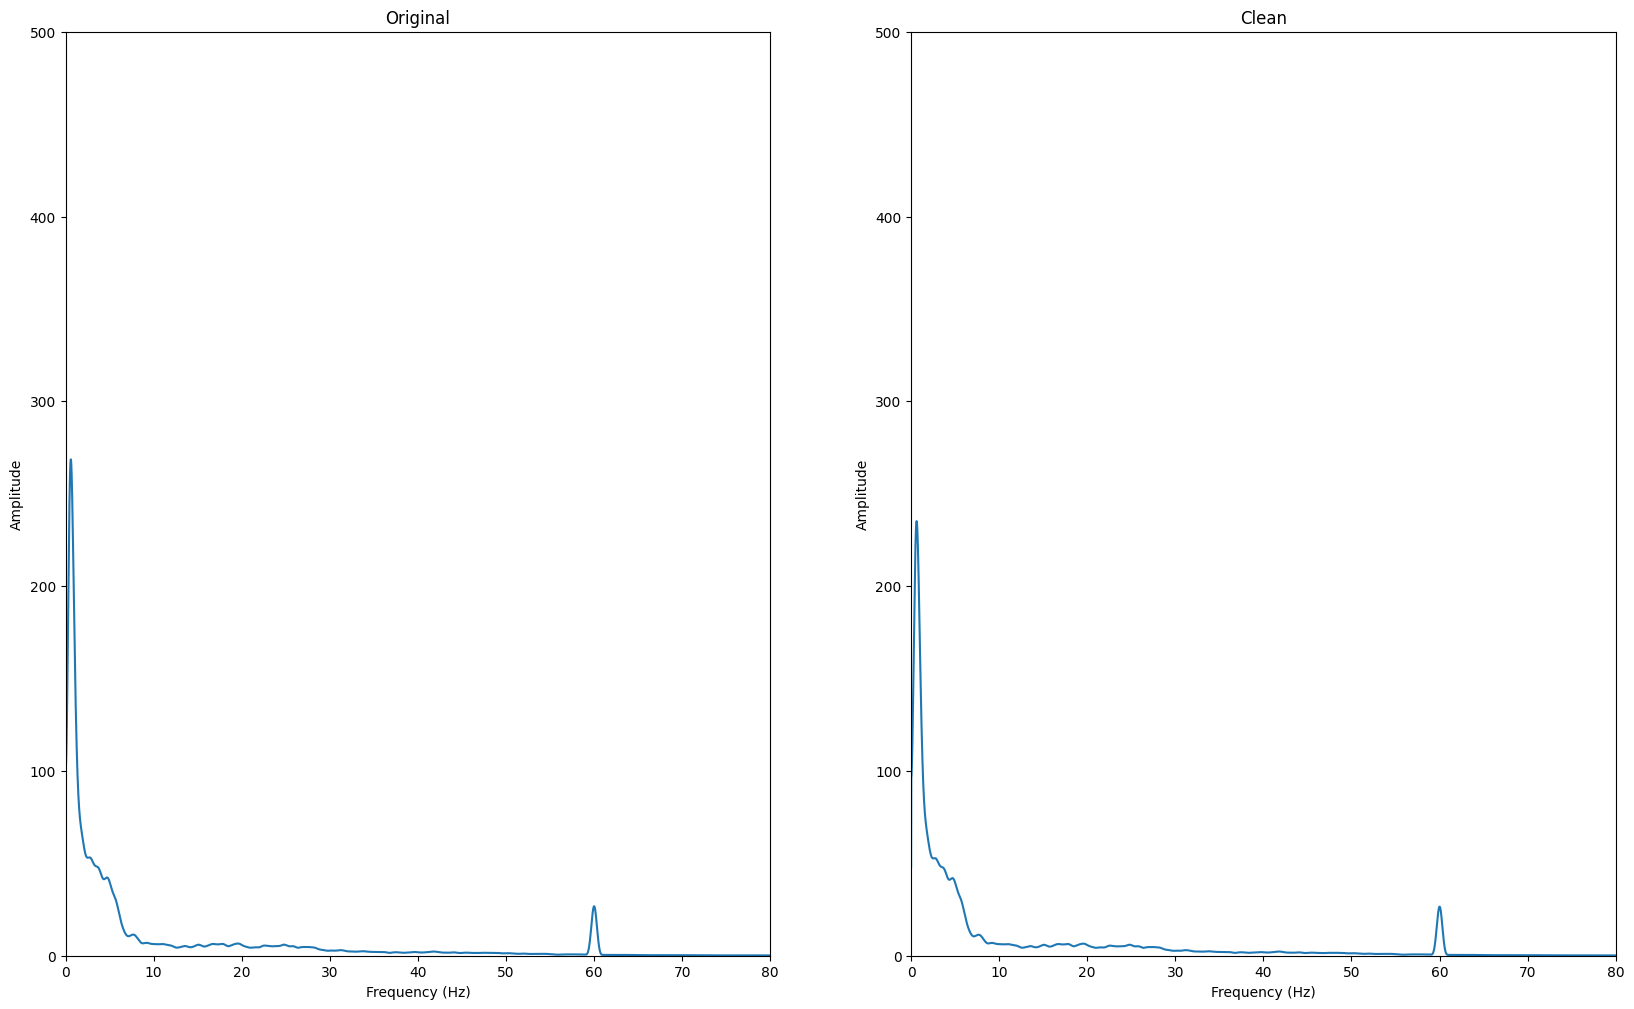

In [31]:
# With original noisy signal
import numpy as np
import scipy.signal
import scipy.fftpack
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 12))
axs[0].plot(f_orig,power_orig)
# axs[0].semilogy(f_orig, power_orig)
axs[0].set_title('Original')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Amplitude')
# axs[0].set_ylim([10**-2,10**4])
axs[0].set_ylim([0,500])
axs[0].set_xlim([0,80])
# axs[0,0].set_xlim([0,10])

axs[1].plot(f_clean,power_clean)
# axs[1].semilogy(f_clean, power_clean)
axs[1].set_title('Clean')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Amplitude')
# axs[1].set_ylim([10**-2,10**4])
axs[1].set_ylim([0,500])
# axs[0,1].set_xlim([0,10])
axs[1].set_xlim([0,80])

# axs[1,0].plot(f_int,10*np.log10(power_int))
# axs[1,0].semilogy(f_int, power_int)
# axs[1,0].set_title('Interpolated')
# axs[1,0].set_xlabel('Frequency (Hz)')
# axs[1,0].set_ylabel('Amplitude')
# axs[1,0].set_ylim([10**-2,10**4])
# axs[1,0].set_xlim([0,100])

(0.0, 80.0)

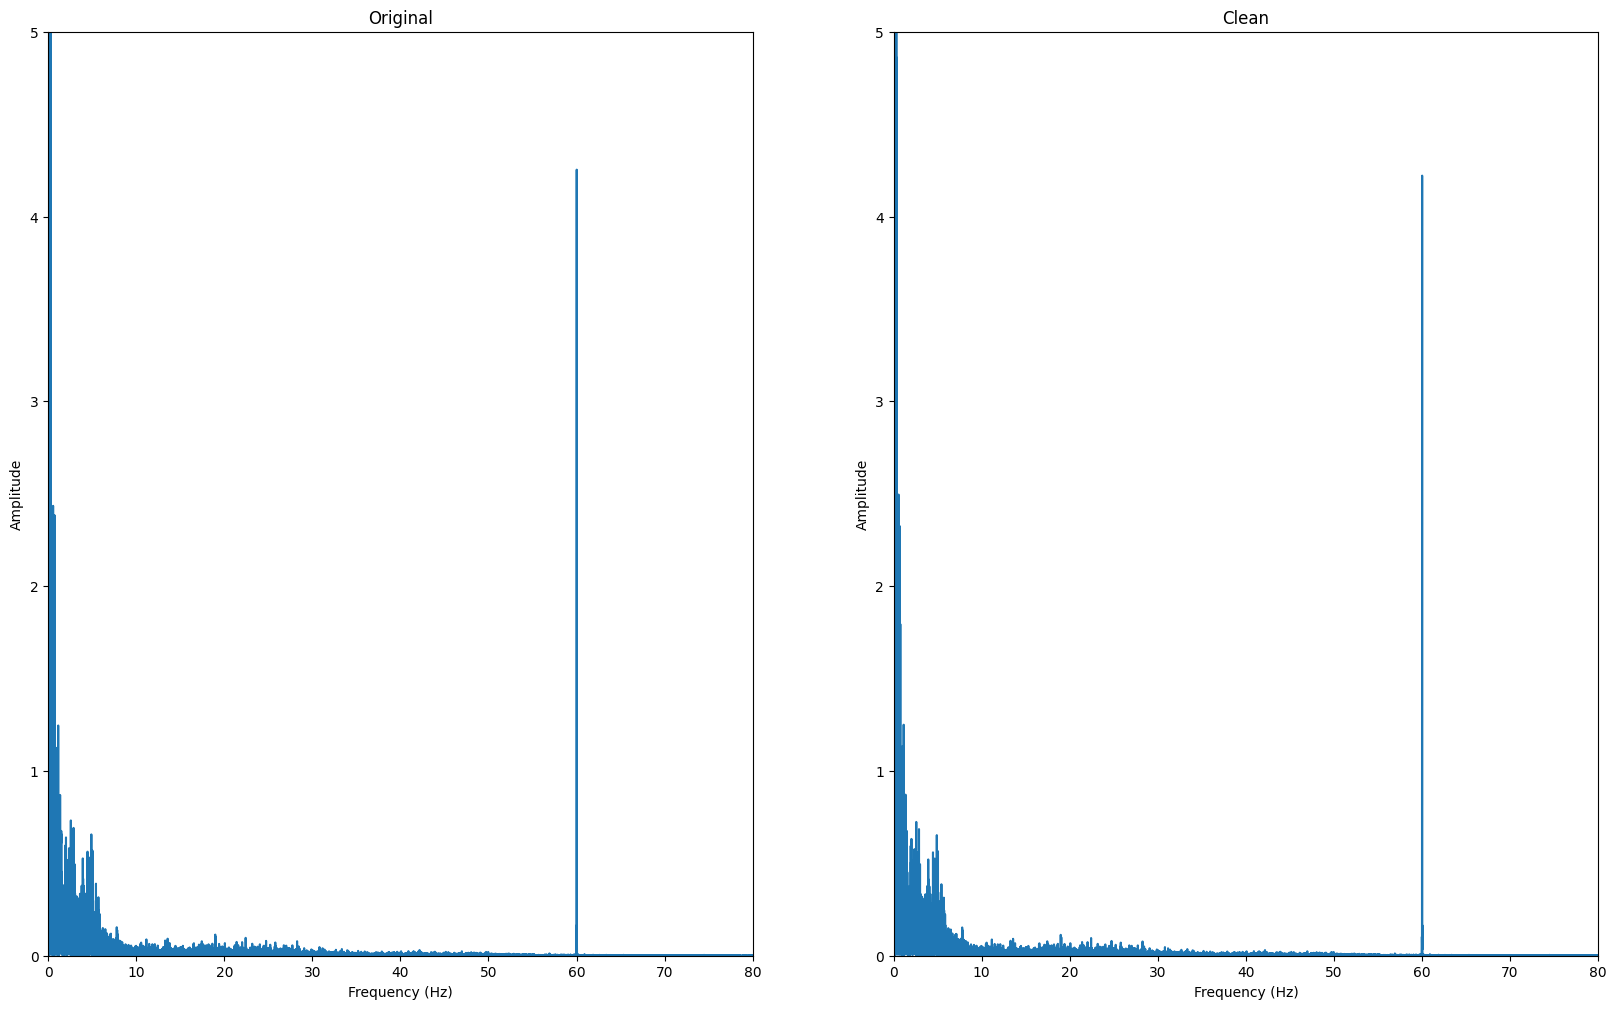

In [25]:
## With original noisy signal
import numpy as np
import scipy.signal
import scipy.fftpack
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 12))
npnts = len(chn_sig)
hzO = np.linspace(0,srate/2,int(np.floor(npnts/2)+1))
signalO_pow = np.abs(scipy.fftpack.fft(chn_sig)/npnts)**2
signalO_pow = signalO_pow[:len(hzO)]
axs[0].plot(hzO,signalO_pow)
# axs[0].semilogy(f_orig, power_orig)
axs[0].set_title('Original')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Amplitude')
# axs[0].set_ylim([10**-2,10**4])
axs[0].set_ylim([0,5])
axs[0].set_xlim([0,80])
# axs[0,0].set_xlim([0,10])


npnts = len(chn_sig_clean)
hzO = np.linspace(0,new_srate/2,int(np.floor(npnts/2)+1))
signalO_pow = np.abs(scipy.fftpack.fft(chn_sig_clean)/npnts)**2
signalO_pow = signalO_pow[:len(hzO)]
axs[1].plot(hzO,signalO_pow)
# axs[1].semilogy(f_clean, power_clean)
axs[1].set_title('Clean')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Amplitude')
# axs[1].set_ylim([10**-2,10**4])
axs[1].set_ylim([0,5])
# axs[0,1].set_xlim([0,10])
axs[1].set_xlim([0,80])

In [32]:
## Figures slides
clean_srate = edf_clean.getSampleFrequencies()[0]/edf_clean.datarecord_duration
idx = edf_clean.getSignalLabels().index('LPHc1')
chn_sig = edf_clean.readSignal(idx)
f, psd = welchMethod(chn_sig, clean_srate)

NameError: name 'welchMethod' is not defined

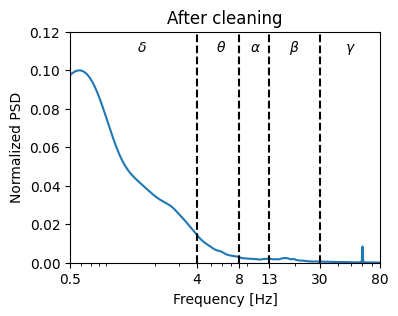

In [35]:
fig, ax = plt.subplots(figsize=(4,3))
plotAllChannels(f.T, psd.T, show_fig=False, ax=ax)
ax.set_title('After cleaning')
plt.show()

In [33]:
edf_in.close()
edf_clean.close()

### Rereferencing

In [ ]:
seegTF = cleanSEEG(out_edf_path_clean, #out_edf_path_clean, # Using clean edf
                   processes = 8)

In [4]:
# rereference(self, aparc_aseg_path, out_edf_path, out_tsv_path):
# aparc_aseg_path = '/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/fastsurfer/sub-P084/mri/aparc+aseg.orig.mgz'
out_edf_path_reref = '/scratch/mcesped/Results/tmp_seeg/sub-EPL31LHS0026_ses-V02SE06_task-full_rec-reref_run-01_clip-01_ieeg.edf'
out_tsv_path_reref = '/scratch/mcesped/Results/tmp_seeg/test_reref.tsv'
electrodes_tsv = '/scratch/mcesped/Datasets/bids_ieeg/Subj_space/sub-EPL31LHS0026/ses-V02SE06/ieeg/sub-EPL31LHS0026_ses-V02SE06_electrodes.tsv'

In [38]:
df_reref, report_reref = seegTF.rereference(electrodes_tsv, out_edf_path_reref, write_tsv = True, out_tsv_path = out_tsv_path_reref, return_report=True)

Running rereference


len annot 3
Channel part


In [39]:
df_reref

,Bipolar channel,Unipolar channels
0,LOFr1-2,"(LOFr1, LOFr2)"
1,LOFr2-3,"(LOFr2, LOFr3)"
2,LOFr3-4,"(LOFr3, LOFr4)"
3,LOFr4-5,"(LOFr4, LOFr5)"
4,LOFr5-6,"(LOFr5, LOFr6)"
...,...,...
128,RPIn5-6,"(RPIn5, RPIn6)"
129,RPIn6-7,"(RPIn6, RPIn7)"
130,RPIn7-8,"(RPIn7, RPIn8)"
131,RPIn8-9,"(RPIn8, RPIn9)"


In [40]:
report_reref

{'Discarded channels': []}

In [7]:
# Run PLI removal
seegTF = cleanSEEG(out_edf_path_reref, # Using downsampled edf
                   methodPLI = 'Cleanline', 
                   lineFreq = 60,
                   bandwidth = 8,
                   n_harmonics = 1, # Only removing fundamental freq
                   processes = 4)
out_edf_path_PLI = '/scratch/mcesped/Results/tmp_seeg/sub-EPL31LHS0026_ses-V02SE06_task-full_rec-PLI_run-01_clip-01_ieeg.edf'

In [5]:
# Run PLI removal: Zapline
seegTF = cleanSEEG(out_edf_path_reref, # Using downsampled edf
                   methodPLI = 'Zapline', 
                   lineFreq = 60,
                   n_harmonics = 1, # Only removing fundamental freq
                   processes = 4)
out_edf_path_PLI = '/scratch/mcesped/Results/tmp_seeg/sub-EPL31LHS0026_ses-V02SE06_task-full_rec-Zapline2_run-01_clip-01_ieeg.edf'

In [9]:
# Run PLI removal: removePLI
seegTF = cleanSEEG(out_edf_path_reref, # Using downsampled edf
                   methodPLI = 'PLIremoval', 
                   lineFreq = 60,
                   n_harmonics = 1, # Only removing fundamental freq
                   processes = 4)
out_edf_path_PLI = '/scratch/mcesped/Results/tmp_seeg/sub-EPL31LHS0026_ses-V02SE06_task-full_rec-PLIremoval_run-01_clip-01_ieeg.edf'

In [6]:
clean, report_PLI = seegTF.reject_PLI(out_tsv_path_reref, write_edf = True, out_edf_path = out_edf_path_PLI, return_report=True)

Removing line noise
lolo


PLI removal completed.
len annot 3
Channel part


/local/mcesped.20077231.0/tmp/kslurm-venv-vyqsx6yw/lib/python3.8/site-packages/pyedflib/edfwriter.py:789: UserWarning: signals are in Fortran order. Will automatically transfer to C order for compatibility with edflib.
  warnings.warn('signals are in Fortran order. Will automatically '


In [9]:
report_PLI

{'Method': 'Zapline', 'Line frequency (Hz)': 60}

### Test reref

In [13]:
# Compare to orig signal
import pyedflib
edf_in = pyedflib.EdfReader(out_edf_dn)

In [14]:
ch = 'LPCg1'
num_ch = edf_in.getSignalLabels().index(ch)

In [15]:
edf_in.getSignalLabels()[num_ch]

'LPCg1'

In [16]:
edf_in.getSignalLabels()[num_ch+1]

'LPCg2'

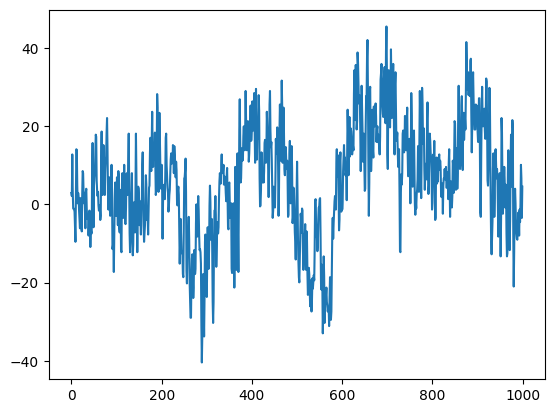

In [17]:
import matplotlib.pyplot as plt
chn_sig1 = edf_in.readSignal(num_ch)
chn_sig2 = edf_in.readSignal(num_ch+1)
chn_sig = chn_sig1 - chn_sig2
plt.plot(chn_sig[0:1000])
# plt.ylim([60,-60])

In [18]:
edf_reref = pyedflib.EdfReader(out_edf_path_PLI)

In [19]:
num_clean = edf_reref.getSignalLabels().index('LPCg1-2')

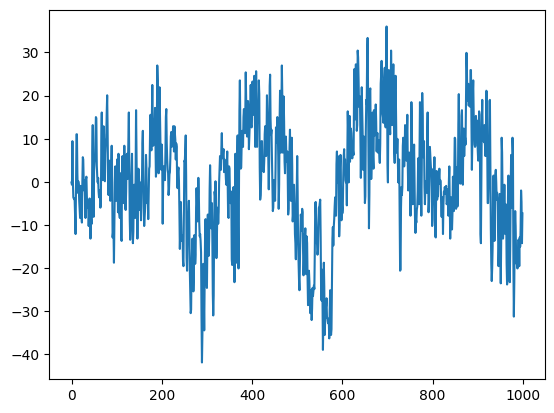

In [20]:
chn_sig_clean = edf_reref.readSignal(num_clean)
plt.plot(chn_sig_clean[0:1000])
# plt.ylim([60,-60])

In [21]:
## Python's welch
import numpy as np
import scipy.io as sio
import scipy.fftpack
import scipy.signal
srate = edf_in.getSampleFrequencies()[0]/edf_in.datarecord_duration
new_srate = edf_reref.getSampleFrequencies()[0]/edf_reref.datarecord_duration
# create Hann window
winsize = int( 2*srate ) # 2-second window
hannw = .5 - np.cos(2*np.pi*np.linspace(0,1,winsize))/2
28
winsize2 = int( 2*new_srate ) # 2-second window
hannw2 = .5 - np.cos(2*np.pi*np.linspace(0,1,winsize2))/2

# number of FFT points (frequency resolution)
nfft = srate*100

In [22]:
# Find spectrums
f_orig, power_orig = scipy.signal.welch(chn_sig,fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)
f_clean, power_clean = scipy.signal.welch(chn_sig_clean,fs=new_srate,window=hannw2,nperseg=winsize2,noverlap=winsize2/4,nfft=nfft)

(0.0, 100.0)

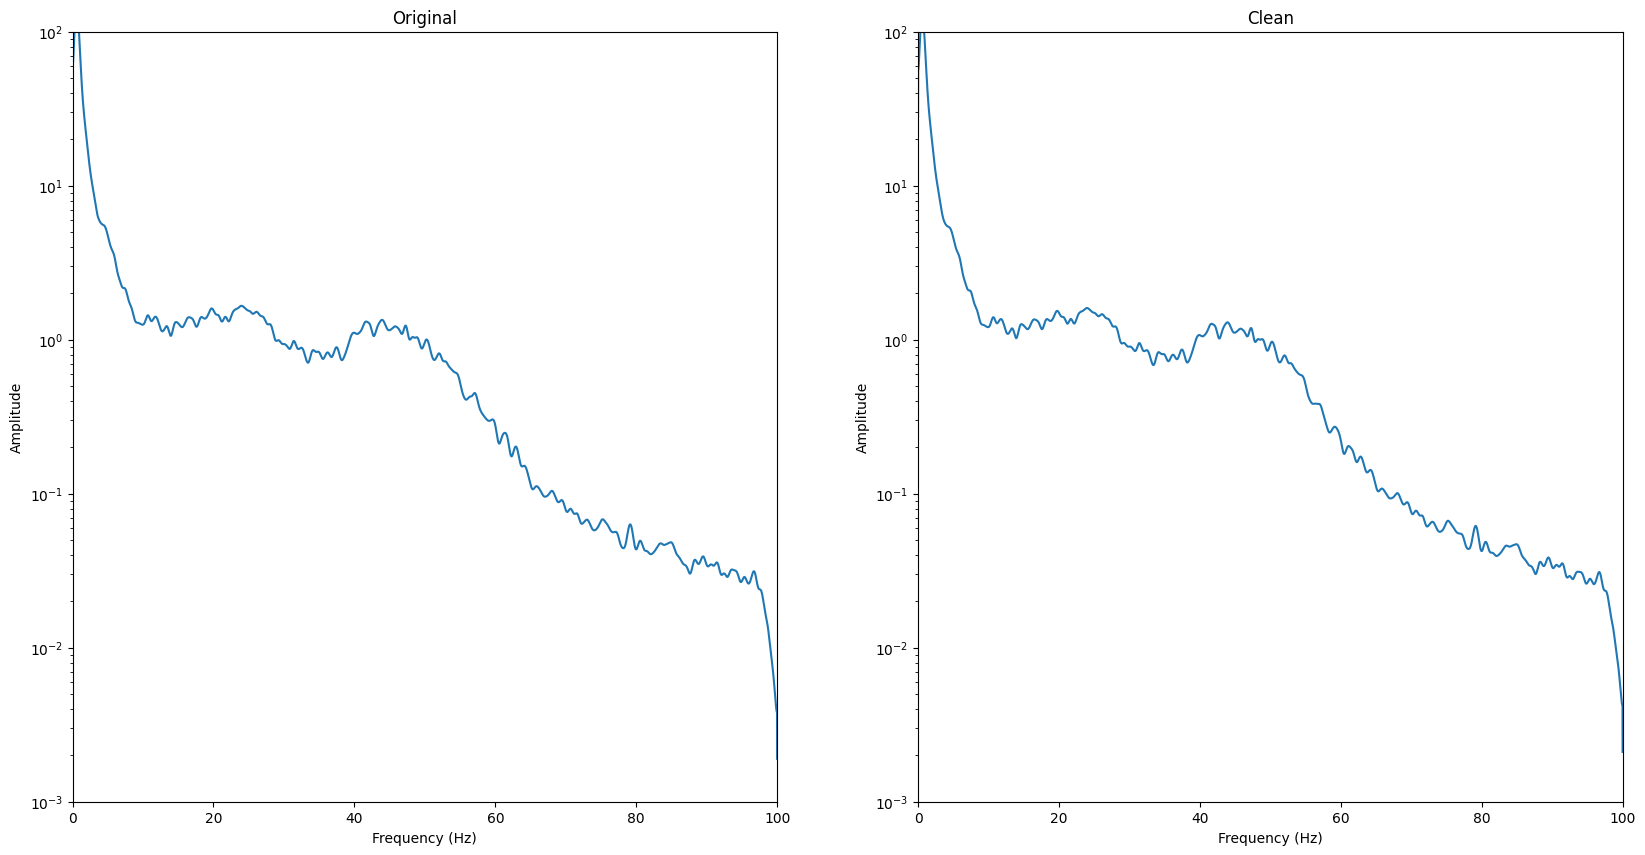

In [23]:
# With original noisy signal
import numpy as np
import scipy.signal
import scipy.fftpack
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
# axs[0,0].plot(f_orig,10*np.log10(power_orig))
axs[0].semilogy(f_orig, power_orig)
axs[0].set_title('Original')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Amplitude')
axs[0].set_ylim([10**-3,10**2])
axs[0].set_xlim([0,100])

# axs[0,1].plot(f_clean,10*np.log10(power_clean))
axs[1].semilogy(f_clean, power_clean)
axs[1].set_title('Clean')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Amplitude')
axs[1].set_ylim([10**-3,10**2])
axs[1].set_xlim([0,100])

In [28]:
## Test frequency. We have to test through time points as we cannot be sure that they will end on the same time point.
t = np.arange(0, len(chn_sig))/srate
downsampledSrate=200.0
newTime = np.arange(0, len(chn_sig_clean))/downsampledSrate
newTime = newTime[newTime<=t[-1]]
print(len(t))
print(len(newTime))
print(len(newTime)*2048/len(t))

48000
48000
2048.0


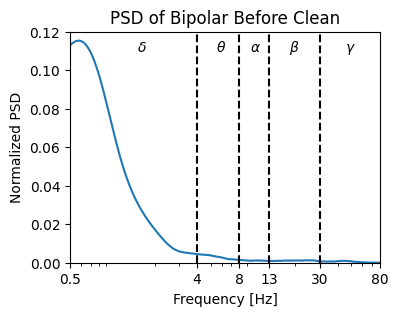

In [29]:
## Figures slides
f, psd = welchMethod(chn_sig, downsampledSrate)
fig, ax = plt.subplots(figsize=(4,3))
plotAllChannels(f.T, psd.T, show_fig=False, ax=ax)
ax.set_title('PSD of Bipolar Before Clean')
plt.show()

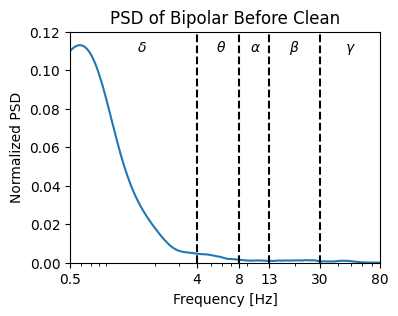

In [30]:
## Figures slides
f, psd = welchMethod(chn_sig_clean, downsampledSrate)
fig, ax = plt.subplots(figsize=(4,3))
plotAllChannels(f.T, psd.T, show_fig=False, ax=ax)
ax.set_title('PSD of Bipolar Before Clean')
plt.show()

In [ ]:
## Figures slides
clean_srate = edf_reref.getSampleFrequencies()[0]/edf_reref.datarecord_duration
idx = edf_reref.getSignalLabels().index('LPHc1-2')
chn_sig = edf_reref.readSignal(idx)
f, psd = welchMethod(chn_sig, clean_srate)
fig, ax = plt.subplots(figsize=(3,2))
plotAllChannels(f.T, psd.T, show_fig=False, ax=ax)
ax.set_title('PSD of bipolar channel in preprocessed file')
plt.show()

In [31]:
edf_reref.close()
edf_in.close()

### Identify regions

In [5]:
# edf_path = '/scratch/mcesped/code/sEEGPrep/Results/anat_MNI152Sym/work/sub-112/ses-006/ieeg/sub-112_ses-006_task-full_rec-PLIreject_run-01_clip-01_ieeg.edf'
# chn_tsv_path = '/scratch/mcesped/code/sEEGPrep/Results/anat_MNI152Sym/work/sub-112/ses-006/ieeg/sub-112_ses-006_task-full_rec-reref_run-01_clip-01_reref_native_space.tsv'
# parc_path = '/scratch/mcesped/code/sEEGPrep/seegprep/workflow/../resources/tpl-MNI152NLin2009cSym/atlas/aal116_roi_atlas.nii.gz'
# colortable_file = '/scratch/mcesped/code/sEEGPrep/seegprep/workflow/../resources/tpl-MNI152NLin2009cSym/atlas/aal_labels.tsv'
# tfm_list = [('/scratch/mcesped/code/sEEGPrep/Results/anat_MNI152Sym/work/sub-112/warps/sub-112_desc-ras_from-subject_to-MNI152NLin2009cSym_affine.txt',True),
#             ('/scratch/mcesped/code/sEEGPrep/Results/anat_MNI152Sym/work/sub-112/warps/sub-112_from-subject_to-MNI152NLin2009cSym_invwarp.nii.gz',False)]

In [15]:
parc_path = '/scratch/mcesped/Results/registration/subject_space/bids/sub-097/anat/sub-097_desc-synthsegcortparc_dseg.nii.gz'
colortable_file = '/scratch/mcesped/code/MNI_Registration/registration_workflow/resources/tpl-MNI305/atlas/FreeSurferColorLUT.tsv'
tfm_list = []
electrodes_tsv = '/scratch/mcesped/Datasets/bids_ieeg/Subj_space/sub-EPL31LHS0026/ses-V02SE07/ieeg/sub-EPL31LHS0026_ses-V02SE07_electrodes.tsv'

In [16]:
# rereference(self, aparc_aseg_path, out_edf_path, out_tsv_path):
out_edf_regions = '/scratch/mcesped/Results/tmp_seeg/sub-097_ses-007_task-full_rec-regionID_run-01_clip-01_ieeg.edf'
out_tsv_path_regions = '/scratch/mcesped/Results/tmp_seeg/test_regions.tsv'
out_json = '/scratch/mcesped/Results/tmp_seeg/test_regions.json'
out_mask = '/scratch/mcesped/Results/tmp_seeg/mask.nii.gz'

In [ ]:
# Testing class with unipolar
out_edf_path_clean = '/scratch/mcesped/Results/tmp_seeg/sub-097_ses-007_task-full_rec-filt_run-01_clip-01_ieeg.edf'
seegTF = cleanSEEG(out_edf_path_clean, ## Use reref results
                   processes = 16)
df_location, df_regions, report = seegTF.identify_regions(electrodes_tsv,
                             parc_path,
                             colortable_file,
                             'unipolar',
                             use_reref = False,
                             write_tsv = True,
                             out_tsv_path = out_tsv_path_regions,
                             discard_wm_un = False,
                             write_edf = True,
                             out_edf_path = out_edf_regions,
                             vol_version = True,
                             json_out = out_json,
                             mask_out = out_mask,
                            return_report=True
                            )

In [17]:
# Testing class with bipolar
out_edf_path_PLI = '/scratch/mcesped/Results/tmp_seeg/sub-097_ses-007_task-full_rec-PLI_run-01_clip-01_ieeg.edf'
seegTF = cleanSEEG(out_edf_path_PLI, ## Use reref results
                   processes = 16)
df_location, df_regions, report = seegTF.identify_regions(electrodes_tsv,
                             parc_path,
                             colortable_file,
                             'bipolar',
                             use_reref = False,
                             write_tsv = True,
                             out_tsv_path = out_tsv_path_regions,
                             discard_wm_un = False,
                             write_edf = True,
                             out_edf_path = out_edf_regions,
                             vol_version = True,
                             json_out = out_json,
                             mask_out = out_mask,
                             return_report=True
                            )

                              name    r    g    b
index                                            
0                          Unknown    0    0    0
1           Left-Cerebral-Exterior   70  130  180
2       Left-Cerebral-White-Matter  245  245  245
3             Left-Cerebral-Cortex  205   62   78
4           Left-Lateral-Ventricle  120   18  134
...                            ...  ...  ...  ...
14171           wm_rh_S_suborbital   21   20   60
14172          wm_rh_S_subparietal  101   60   60
14173         wm_rh_S_temporal_inf   21  180  180
14174         wm_rh_S_temporal_sup  223  220   60
14175  wm_rh_S_temporal_transverse  221   60   60

[1292 rows x 4 columns]
[   2    2 1012 1012 1012   24    2 1019   24 1023    2    2    2    2
    2    2    2    2   18   18   18   18    2 1030 1030 1030 1030   17
   17   17   17    2    2    2    2    2   17   17   17    2    2    2
    2 1015 1015 1033 1033 1033 1030   24   24   24    0    0 1035 1035
 1035 1035 1035 1035 1035 1035 1035 1030 

In [18]:
df_regions.head()

,Region,Number of channels,Channels
0,Left-Cerebral-White-Matter,21,"[LOFr1-2, LOFr2-3, LOFr7-8, LPCg2-3, LPCg3-4, ..."
1,ctx-lh-lateralorbitofrontal,3,"[LOFr3-4, LOFr4-5, LOFr5-6]"
2,CSF,12,"[LOFr6-7, LOFr9-10, LTePo5-6, LTePo6-7, LTePo7..."
3,ctx-lh-parsorbitalis,1,[LOFr8-9]
4,ctx-lh-posteriorcingulate,1,[LPCg1-2]


In [20]:
print(report)

{'Discarded channels': ['LOFr1', 'LOFr2', 'LOFr3', 'LOFr4', 'LOFr5', 'LOFr6', 'LOFr7', 'LOFr8', 'LOFr9', 'LOFr10', 'LPCg1', 'LPCg2', 'LPCg3', 'LPCg4', 'LPCg5', 'LPCg6', 'LPCg7', 'LPCg8', 'LPCg9', 'LPCg10', 'LAm1', 'LAm2', 'LAm3', 'LAm4', 'LAm5', 'LAm6', 'LAm7', 'LAm8', 'LAm9', 'LAm10', 'LAHc1', 'LAHc2', 'LAHc3', 'LAHc4', 'LAHc5', 'LAHc6', 'LAHc7', 'LAHc8', 'LAHc9', 'LAHc10', 'LPHc1', 'LPHc2', 'LPHc3', 'LPHc4', 'LPHc5', 'LPHc6', 'LPHc7', 'LPHc8', 'LPHc9', 'LPHc10', 'LTePo1', 'LTePo2', 'LTePo3', 'LTePo4', 'LTePo5', 'LTePo6', 'LTePo7', 'LTePo8', 'LTePo9', 'LTePo10', 'LAIn1', 'LAIn2', 'LAIn3', 'LAIn4', 'LAIn5', 'LAIn6', 'LAIn7', 'LAIn8', 'LAIn9', 'LAIn10', 'LPIn1', 'LPIn2', 'LPIn3', 'LPIn4', 'LPIn5', 'LPIn6', 'LPIn7', 'LPIn8', 'LPIn9', 'LPIn10', 'ROFr1', 'ROFr2', 'ROFr3', 'ROFr4', 'ROFr5', 'ROFr6', 'ROFr7', 'ROFr8', 'ROFr9', 'ROFr10', 'RPCg1', 'RPCg2', 'RPCg3', 'RPCg4', 'RPCg5', 'RPCg6', 'RPCg7', 'RPCg8', 'RPCg9', 'RPCg10', 'RAm1', 'RAm2', 'RAm3', 'RAm4', 'RAm5', 'RAm6', 'RAm7', 'RAm8', 'R

In [8]:
import nibabel as nb
import numpy as np
import mne
import matplotlib.pyplot as plt
img = nb.load('/scratch/mcesped/Results/tmp_seeg/mask_bipolar.nii.gz')

In [9]:
data = img.get_fdata()
data.shape

(512, 512, 292)

In [11]:
inv_affine = np.linalg.inv(img.affine)
coord = [39.658,-38.099,-1.774]
# To voxels
vox = np.round((mne.transforms.apply_trans(inv_affine, coord))).astype(int)
vox

array([334, 186, 118])

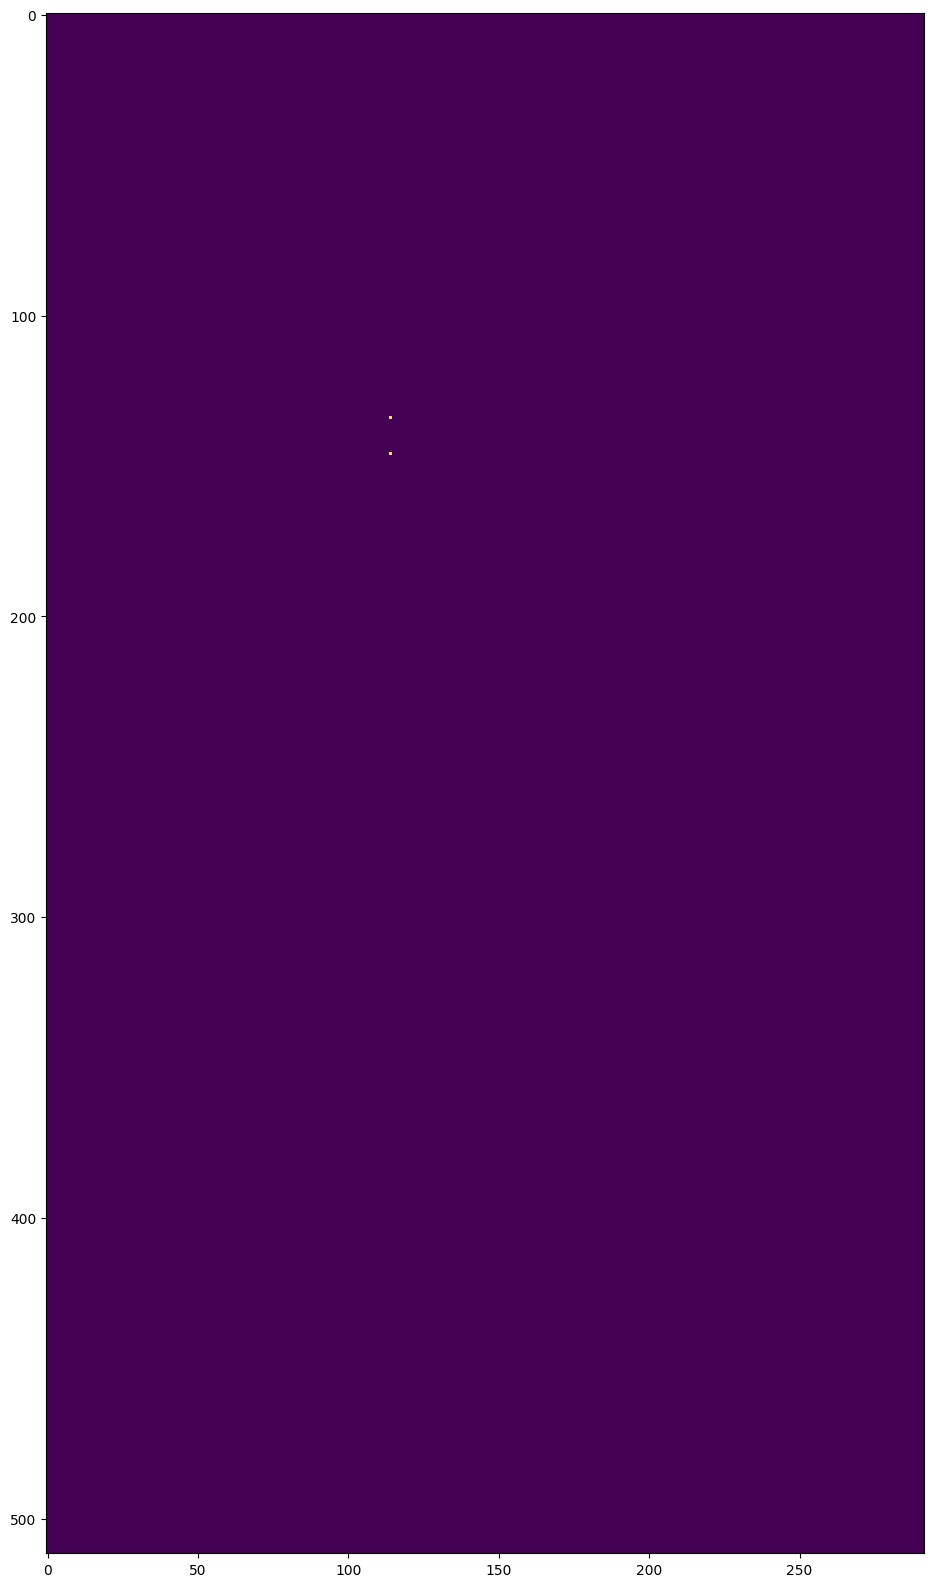

In [29]:
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(data[:, vox[1]+5, :])

# Extra

In [ ]:
a = np.array([1,2, 3])
b = np.array([0,4,5])
a < b

In [ ]:
import psutil
psutil.virtual_memory()

In [ ]:
avail_mem = psutil.virtual_memory()[1]

In [ ]:
ns = 1000000000000
nc = 64
blocksize = 10
req_mem = nc*nc*16*(ns+blocksize)/blocksize
print(req_mem)
print(avail_mem)

In [ ]:
if req_mem>avail_mem:
        # Recalculate the blocksize
        blocksize = int(-(16*nc*nc*ns)/(16*nc*nc - avail_mem*0.8))
blocksize

In [ ]:
req_mem = nc*nc*16*(ns+blocksize)/blocksize
print(req_mem)
print(avail_mem)

In [ ]:
edf_path = '/home/mcesped/scratch/code/HippiEEGAtlas/epochs/results/sub-079/ses-002/ieeg/epoch.edf'
import pyedflib
f = pyedflib.EdfReader(edf_path)

In [ ]:
annot = f.readAnnotations()
annot

In [ ]:
edf_path = '/home/mcesped/scratch/code/sEEGPrep/Results/test.edf'
import pyedflib
f = pyedflib.EdfReader(edf_path)

In [ ]:
annot = f.readAnnotations()
annot

In [ ]:
import numpy as np
for annot_id in np.arange(len(annot)):
    print(annot[0][annot_id], annot[1][annot_id], annot[2][annot_id])

In [ ]:
int(annot[0][0])

In [ ]:
f.close()

In [12]:
# Test filter
import numpy as np
from scipy.signal import kaiserord, firwin, filtfilt
srate=2048
Transition = [0.5, 1.5]
Attenuation = 80
nyq_rate = srate / 2

# Width of the roll-off region.
width = 2*(Transition[1]-Transition[0]) / nyq_rate

num_of_taps, beta = kaiserord(Attenuation, width)
if num_of_taps % 2 == 0:
    num_of_taps = num_of_taps + 1
num_of_taps 

5141

In [ ]:
# Estimate the filter coefficients.
filtkern = firwin(num_of_taps, Transition[1]/nyq_rate, window=('kaiser', beta), pass_zero=False)

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(121)
plt.plot(filtkern)
plt.xlabel('Time points')
plt.title('Filter kernel (firls)')

In [ ]:
import scipy.fftpack
hz = np.linspace(0,10,int(np.floor(len(filtkern)/2)+1))
filterpow = np.abs(scipy.fftpack.fft(filtkern))**2
plt.plot(hz,filterpow[:len(hz)],'ks-')
plt.xlim([0,0.5])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter gain')
plt.title('Frequency response')
plt.show()

In [9]:
import scipy.signal as signal
order   = int( 5*srate/0.3 )
# force odd order
if order%2==0:
    order += 1
filtkern = signal.firwin(order, 0.3, fs=srate, pass_zero=False)

In [11]:
3.3/(0.3/2048)

22528.0

Text(0.5, 1.0, 'Filter kernel (firls)')

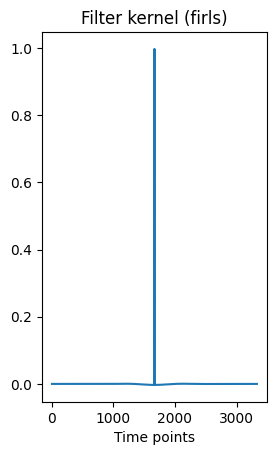

In [5]:
import matplotlib.pyplot as plt
plt.subplot(121)
plt.plot(filtkern)
plt.xlabel('Time points')
plt.title('Filter kernel (firls)')

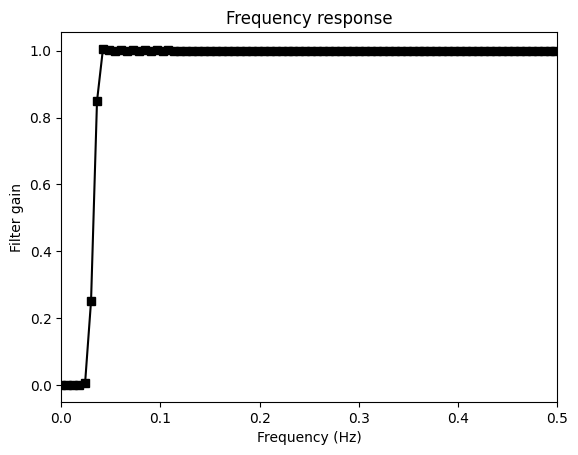

In [6]:
import scipy.fftpack
hz = np.linspace(0,10,int(np.floor(len(filtkern)/2)+1))
filterpow = np.abs(scipy.fftpack.fft(filtkern))**2
plt.plot(hz,filterpow[:len(hz)],'ks-')
plt.xlim([0,0.5])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter gain')
plt.title('Frequency response')
plt.show()

In [4]:
def get_srate_params(srate, max_srate=254): # max_srate=254 as uses int8
    n_min = int(np.floor(srate/max_srate))
    for i in range(n_min+1, int(srate/2)):
        if srate % i == 0:
            duration = 1/i
            if len(str(duration).split(".")[1]) <= 4:
                return 1/i, srate/i
    raise Exception('No appropriate parameters found in get_srate_params')

In [5]:
import numpy as np
a, b = get_srate_params(250)
a,b

(1.0, 250.0)

In [25]:
len(str(a).split(".")[1])

4